# Part 1: Introduction

In [431]:
import pandas as pd
import numpy as np

In [432]:
import matplotlib.pyplot as plt

In [433]:
X=np.random.normal(0,1,100)

In [434]:
X

array([-1.09994974, -0.22766812,  1.87921151, -0.06487917,  0.77241597,
        1.18242067, -0.44301935, -1.9443218 ,  0.05328962, -2.06396103,
       -0.07058536, -1.51826815, -1.31585861, -0.19436751, -0.18493174,
        1.17893524, -1.73937103,  0.15333761, -0.36258708, -1.47587812,
       -0.31823459,  0.46467493, -0.89731969, -0.79151557,  0.53240983,
       -1.06615002,  0.67738719, -0.75074437,  0.16900296, -0.51431309,
       -2.11763507, -1.52853379,  0.75042629, -0.55780891, -0.98900072,
        0.342525  , -0.54617971, -0.79152057, -0.34626913, -0.13711941,
       -0.25148083, -0.36486753, -0.41714095,  1.12700758,  0.65649979,
        0.47648773, -1.12778248, -0.41179233,  0.3969091 ,  0.5424355 ,
       -1.27556283,  0.32933444,  0.15922941, -2.21790367, -1.40825948,
        1.1808137 , -0.29642578,  1.57429936,  1.43321315,  0.26896914,
       -2.50050457,  1.03010952,  1.99508395,  0.22355658, -0.3131316 ,
       -1.09873746, -0.46939135,  0.21323333,  0.91631742,  0.48

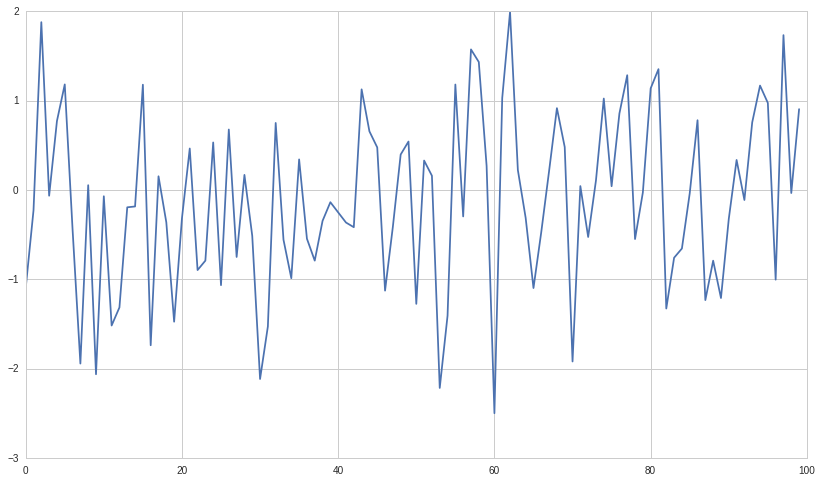

In [435]:
plt.plot(X)

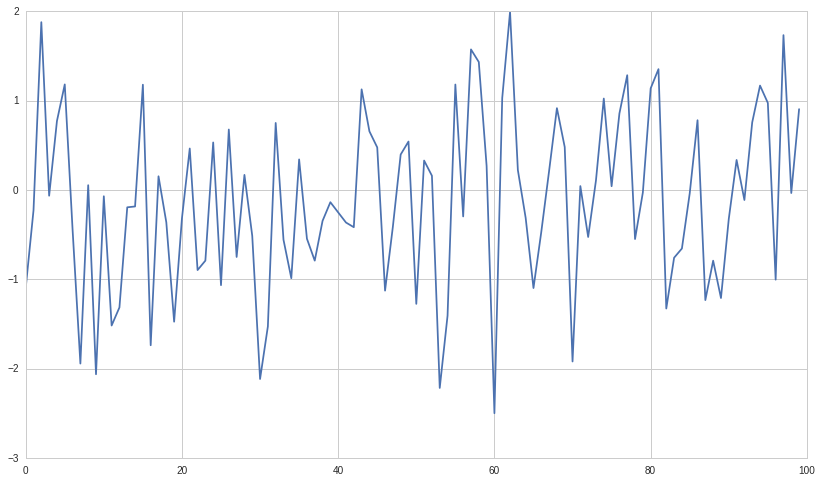

In [436]:
plt.plot(X);

In [437]:
X2=np.random.normal(0,1,100)


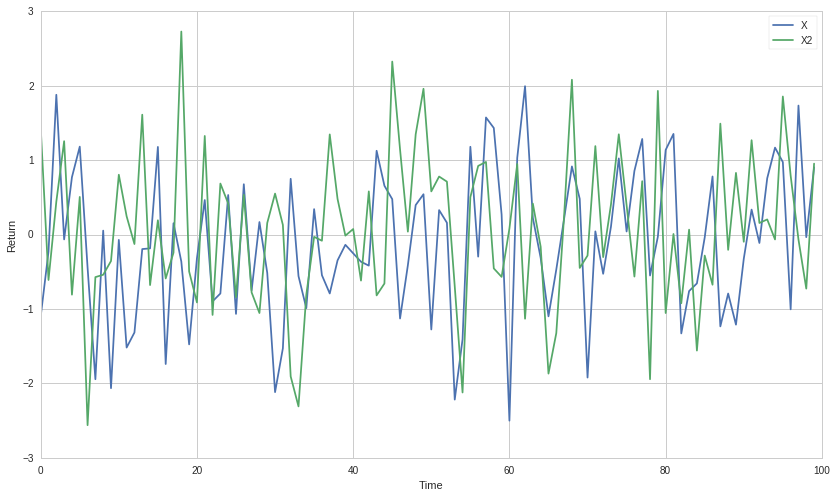

In [438]:
plt.plot(X)
plt.plot(X2)
plt.xlabel("Time")
plt.ylabel("Return")
plt.legend(["X","X2"]);

In [439]:
np.mean(X)

-0.13064225931469192

In [440]:
np.max(X)

1.9950839469142168

In [441]:
np.min(X)

-2.5005045689906353

In [442]:
np.std(X)

0.98619199204236141

In [443]:
data=get_pricing('AAPL',start_date='01-01-2019', end_date='20-04-2020') 
data2=get_pricing('MSFT', start_date='1-01-2019', end_date='20-04-2020')
data.head()

,open_price,high,low,close_price,volume,price
2019-01-02 00:00:00+00:00,152.236,156.128,151.587,155.214,25244789.0,155.214
2019-01-03 00:00:00+00:00,141.513,143.223,139.567,139.651,72116281.0,139.651
2019-01-04 00:00:00+00:00,142.054,146.005,141.336,145.720,46074105.0,145.720
2019-01-07 00:00:00+00:00,146.152,146.280,143.400,145.356,45122495.0,145.356
2019-01-08 00:00:00+00:00,146.997,149.219,145.975,148.187,32415422.0,148.187


In [444]:
X=data['price']
X2=data2['price']
X[0:5]

2019-01-02 00:00:00+00:00    155.214
2019-01-03 00:00:00+00:00    139.651
2019-01-04 00:00:00+00:00    145.720
2019-01-07 00:00:00+00:00    145.356
2019-01-08 00:00:00+00:00    148.187
Freq: C, Name: price, dtype: float64

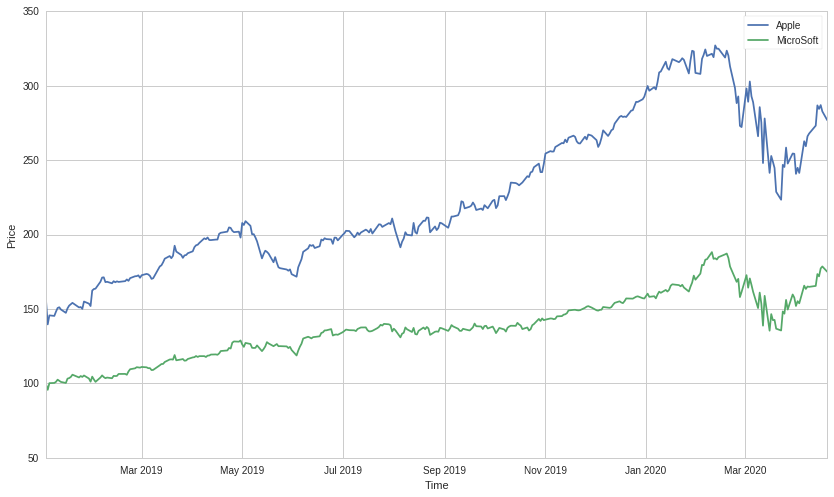

In [445]:
plt.plot(X.index, X.values);
plt.plot(X2.index, X2.values);
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend(["Apple","MicroSoft"]);

In [446]:
X.pct_change()[0:5]

2019-01-02 00:00:00+00:00         NaN
2019-01-03 00:00:00+00:00   -0.100268
2019-01-04 00:00:00+00:00    0.043458
2019-01-07 00:00:00+00:00   -0.002498
2019-01-08 00:00:00+00:00    0.019476
Freq: C, Name: price, dtype: float64

In [447]:
Xr=X.pct_change()[1:]
X2r=X2.pct_change()[1:]
Xr[0:5]

2019-01-03 00:00:00+00:00   -0.100268
2019-01-04 00:00:00+00:00    0.043458
2019-01-07 00:00:00+00:00   -0.002498
2019-01-08 00:00:00+00:00    0.019476
2019-01-09 00:00:00+00:00    0.016844
Freq: C, Name: price, dtype: float64

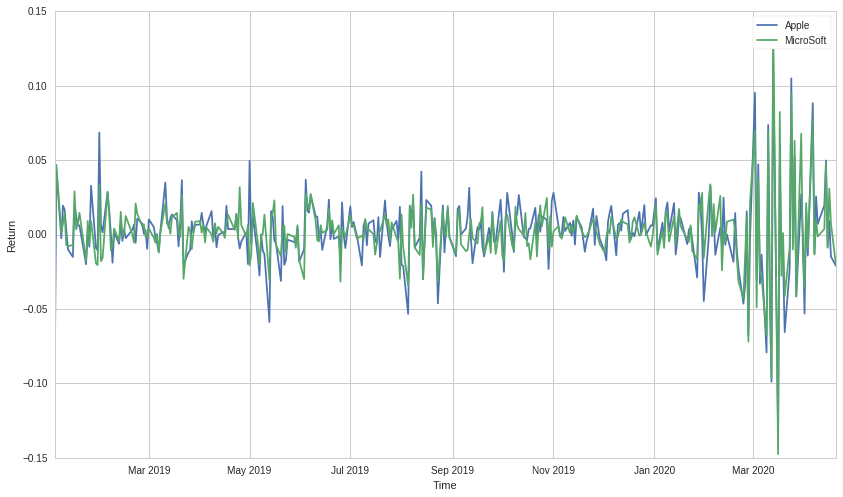

In [448]:
plt.plot(Xr.index, Xr.values);
plt.plot(X2r.index, X2r.values);
plt.xlabel("Time")
plt.ylabel("Return")
plt.legend(["Apple","MicroSoft"]);

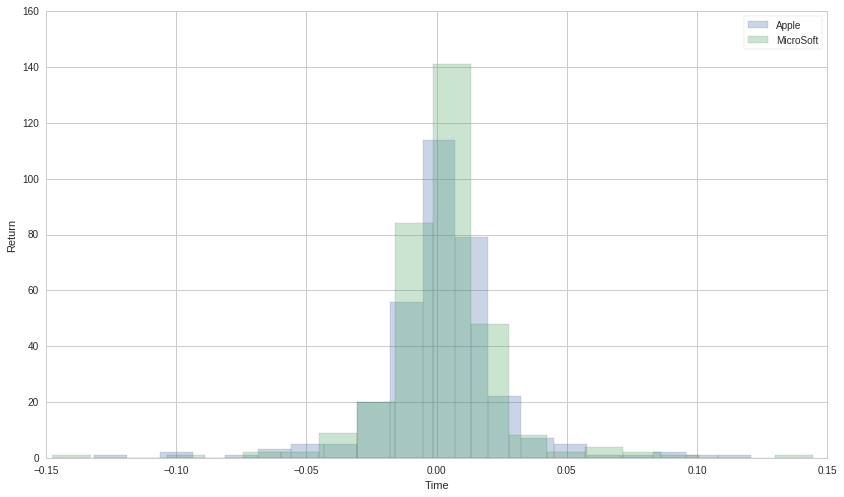

In [449]:
plt.hist(Xr, bins=20, alpha =0.3)
plt.hist(X2r, bins=20, alpha=0.3);
plt.xlabel("Time")
plt.ylabel("Return")
plt.legend(["Apple","MicroSoft"]);

* Is this return normally distributed ?

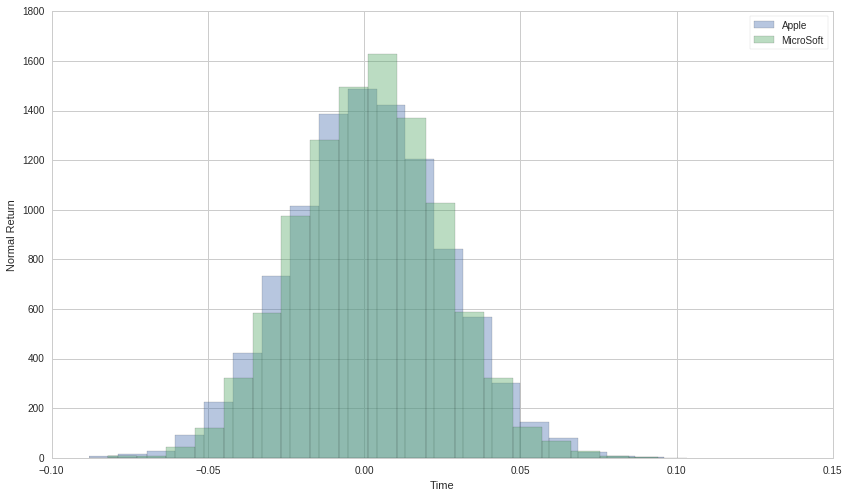

In [450]:
plt.hist(np.random.normal(np.mean(Xr), np.std(Xr), 10000), bins=20, alpha=0.4);
plt.hist(np.random.normal(np.mean(X2r), np.std(X2r), 10000), bins=20, alpha=0.4);
plt.xlabel("Time")
plt.ylabel("Normal Return")
plt.legend(["Apple","MicroSoft"]);

* Since above two graps do not match we say that it is not noraml.
* Whixh means that mean ans std are not good extimate of returns

## Moving Average

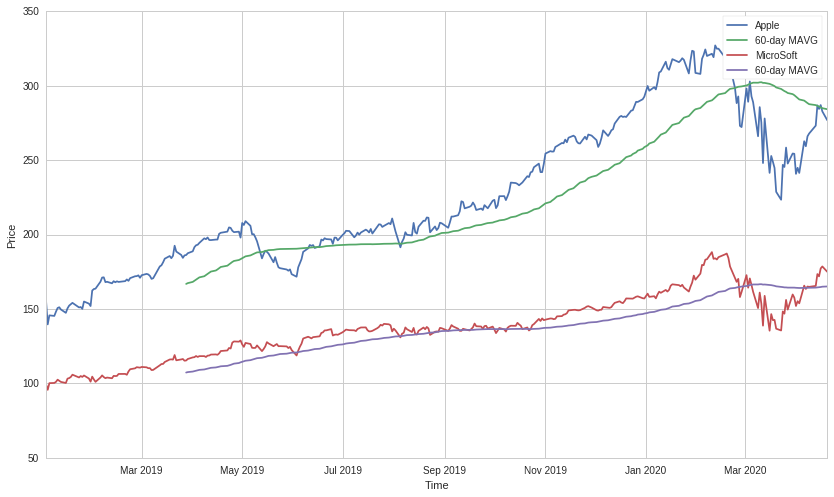

In [451]:
Xmavg=X.rolling(window=60,center=False).mean()
plt.plot(X.index, X.values);
plt.plot(X.index, Xmavg.values);

X2mavg=X2.rolling(window=60,center=False).mean()
plt.plot(X2.index, X2.values);
plt.plot(X2.index, X2mavg.values);

plt.xlabel("Time")
plt.ylabel("Price")
plt.legend(["Apple","60-day MAVG","MicroSoft","60-day MAVG"]);

# Part 2

In [452]:
X[::100] # Jumping by 100 from front

2019-01-02 00:00:00+00:00    155.214
2019-05-28 00:00:00+00:00    176.545
2019-10-17 00:00:00+00:00    234.030
2020-03-12 00:00:00+00:00    248.090
Freq: 100C, Name: price, dtype: float64

In [453]:
X[::-100] # Jumping by 100 from behin\d

2020-04-20 00:00:00+00:00    276.855
2019-11-22 00:00:00+00:00    261.220
2019-07-03 00:00:00+00:00    202.546
2019-02-08 00:00:00+00:00    168.297
Freq: -100C, Name: price, dtype: float64

In [454]:
set(Xr) & set(X2r) # ANDing SET

{0.0}

In [455]:
set(Xr) | set(X2r) #ORing Set 


{-0.14753541076487253,
 -0.13159030425088114,
 -0.10026801706031663,
 -0.098870364316588577,
 -0.096210197304161027,
 -0.079209633884698039,
 -0.071948784212381045,
 -0.067772482515318422,
 -0.067540804479956362,
 -0.065528229430508955,
 -0.058690236878583879,
 -0.053261401678295517,
 -0.053008257963035876,
 -0.048856729377713459,
 -0.046417276299396182,
 -0.046326771409054279,
 -0.046225267730806929,
 -0.044651064896636616,
 -0.042898745519713288,
 -0.041637307027096226,
 -0.041550603528319408,
 -0.041354173967897756,
 -0.037182389937106874,
 -0.03633308831250659,
 -0.035587414361836989,
 -0.034406730918127293,
 -0.034003350083751993,
 -0.032964130668031055,
 -0.03172447034594561,
 -0.031642416516476812,
 -0.031355104697840974,
 -0.031165724111782311,
 -0.030502911677779632,
 -0.030117191198642312,
 -0.030051639729059221,
 -0.029862449766393295,
 -0.029813192469967942,
 -0.029756855499097012,
 -0.029636821287306825,
 -0.028820559022450953,
 -0.028121146500646677,
 -0.02763184826362818

# Part 3 Returns and Variance

## Creating random assets to form Portfolio

In [456]:
N=10
assets=np.zeros(shape=(N,100))
returns=np.zeros(shape=(N,100))

In [457]:
R_1=np.random.normal(1.01, 0.03, 100)
R_1

array([ 1.01125394,  1.01584137,  1.03051981,  0.97269541,  1.03453772,
        1.02573477,  1.01907766,  1.02636775,  1.01660149,  0.9441692 ,
        0.98890328,  1.03855188,  1.04380083,  0.97987731,  1.04978153,
        1.01096126,  1.03948758,  0.99785919,  0.96720711,  1.06859406,
        1.04179317,  0.98715793,  1.04567752,  1.00404345,  0.97204041,
        1.01959571,  1.03777993,  0.98786703,  1.06239528,  0.97437696,
        0.97527589,  1.02673036,  1.0238893 ,  1.02750668,  0.98911869,
        1.0025407 ,  0.98408912,  1.01636497,  0.97203283,  1.00526138,
        1.0179125 ,  1.09122129,  1.00672203,  1.01111396,  1.06139633,
        1.04720468,  1.07193674,  1.00732865,  1.03593578,  0.99037815,
        0.95495518,  1.06943712,  1.02449147,  0.98420332,  0.98162885,
        0.98135024,  0.97859304,  1.04782234,  1.00637339,  0.95965432,
        0.99474234,  0.99169629,  0.96395631,  1.03619794,  0.96709002,
        1.01302726,  1.01460715,  0.98061223,  0.96872976,  0.97

In [458]:
returns[0]=R_1

In [459]:
assets[0]=np.cumprod(R_1)

In [460]:
for i in range(1,N):
    R_i=R_1+np.random.normal(0.001, 0.02, 100)
    returns[i]=R_i
    assets[i]=np.cumprod(R_1)


In [461]:
mean_returns=[(np.mean(R)-1)*100 for R in returns]
return_std=[np.std(R) for R in returns]

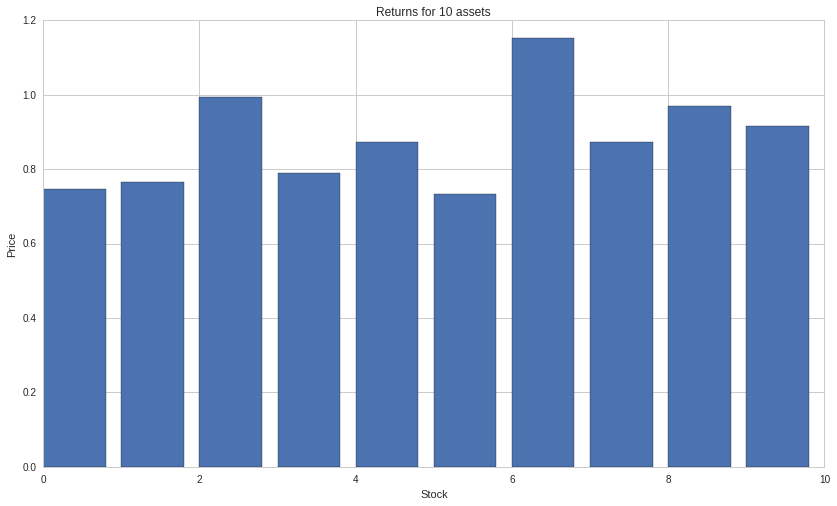

In [462]:
plt.bar(np.arange(len(mean_returns)), mean_returns)
plt.xlabel("Stock")
plt.ylabel("Price")
plt.title("Returns for 10 assets");

## Creating Portfolio

### Creating weights for portfolio

In [463]:
weights= np.random.uniform(0,1,N)
print(sum(weights))
weights=weights/np.sum(weights)# To make weights total as one
print(sum(weights))

3.67041030206
1.0


### Expected Portfolio Returns

In [464]:
p_returns=np.dot(weights, mean_returns)
print("Expected Return", p_returns)

Expected Return 0.920003465678


#### Mean of NaN values

In [465]:
v=np.array([1,2, np.nan, 4, 5])

In [466]:
v.mean()

nan

In [467]:
np.isnan(v)

array([False, False,  True, False, False], dtype=bool)

In [468]:
v[~np.isnan(v)].mean()

3.0

In [469]:
np.nanmean(v)

3.0

### Portfolio Variance

Independednt Assets: $$ w_1^2\sigma_1^2 + w_2^2\sigma_2^2  + ... w_n^2\sigma_n^2 $$ 

Dependednt Assets: $$ w_1^2\sigma_1^2 + w_2^2\sigma_2^2  + ... w_n^2\sigma_n^2 + \sum_i\sum_{j\ne i}{w_iw_j\sigma_i\sigma_j\rho_{ij}} $$ 

$$ \rho_{ij}=correlation=\frac{COV[S_1,S_2]}{\sigma_i\sigma_j}$$

$$ S_1 = \text{Security or Asset 1 Returns} $$
$$ S_2 = \text{Security or Asset 2 Returns} $$

In [470]:
returns.shape

(10, 100)

In [471]:
cov_matrix=np.cov(returns)
cov_matrix.shape

(10, 10)

In [472]:
print(cov_matrix)

[[ 0.00098765  0.00097609  0.00104707  0.00099483  0.00088886  0.00105398
   0.00093279  0.00097404  0.00094591  0.00101511]
 [ 0.00097609  0.00122722  0.00105156  0.00095508  0.0008642   0.00099808
   0.00099171  0.00097997  0.00091039  0.00103241]
 [ 0.00104707  0.00105156  0.00153179  0.00100068  0.00096054  0.00114047
   0.00107458  0.00105713  0.00101188  0.00101712]
 [ 0.00099483  0.00095508  0.00100068  0.00140665  0.00097101  0.00105508
   0.00086607  0.00108034  0.00092041  0.00104626]
 [ 0.00088886  0.0008642   0.00096054  0.00097101  0.001109    0.00096296
   0.00082876  0.00086178  0.00085301  0.00087784]
 [ 0.00105398  0.00099808  0.00114047  0.00105508  0.00096296  0.00150832
   0.00099802  0.00098338  0.00105159  0.00107976]
 [ 0.00093279  0.00099171  0.00107458  0.00086607  0.00082876  0.00099802
   0.00122211  0.00089766  0.00095526  0.00091174]
 [ 0.00097404  0.00097997  0.00105713  0.00108034  0.00086178  0.00098338
   0.00089766  0.00136491  0.00098927  0.00104543]


Covarinace Matrix
\begin{bmatrix}
VAR & coVAR & coVAR\\
coVAR & VAR & coVAR \\
coVAR & coVAR & VAR 
\end{bmatrix}

##### On Algebra Calculation we can write our Portfolio Varince as:

$$ \text{Portfolio Varince} =\rho_p^2=wCw^T$$

In [473]:
var_p=np.dot(np.dot(weights, cov_matrix), weights.T)

print("Portfolio Volatility:", np.sqrt(var_p))

Portfolio Volatility: 0.0325108462837


# Part 4

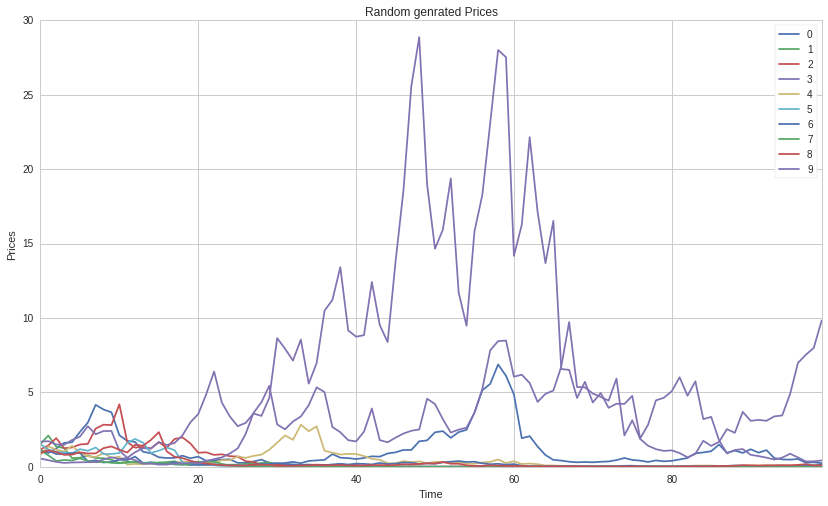

In [474]:
returns=pd.DataFrame(np.random.normal(1,0.3,size=(100,10)))
prices=returns.cumprod()
prices.plot()
plt.title("Random genrated Prices")
plt.xlabel("Time")
plt.ylabel("Prices")
plt.legend(loc=0);

#### Series

In [475]:
s=pd.Series([1,2,3,np.nan, 10])
s

0     1.0
1     2.0
2     3.0
3     NaN
4    10.0
dtype: float64

In [476]:
print(s.name)

None


In [477]:
s.name="Hi"

In [478]:
print(s.name)

Hi


In [479]:
s.index

RangeIndex(start=0, stop=5, step=1)

In [480]:
new_index=pd.date_range("04-11-2016", periods=len(s), freq="D")
print(new_index)

DatetimeIndex(['2016-04-11', '2016-04-12', '2016-04-13', '2016-04-14',
               '2016-04-15'],
              dtype='datetime64[ns]', freq='D')


In [481]:
 s.index=new_index

In [482]:
s

2016-04-11     1.0
2016-04-12     2.0
2016-04-13     3.0
2016-04-14     NaN
2016-04-15    10.0
Freq: D, Name: Hi, dtype: float64

#### Acessing Series

In [483]:
s.iloc[0] # First Element

1.0

In [484]:
s.iloc[len(s)-1] # Last Element

10.0

In [485]:
 s.iloc[::2] # Steps

2016-04-11     1.0
2016-04-13     3.0
2016-04-15    10.0
Freq: 2D, Name: Hi, dtype: float64

In [486]:
start=0
end=len(s)-1
step=2
s[start:end:step] # Master slicer formula

2016-04-11    1.0
2016-04-13    3.0
Freq: 2D, Name: Hi, dtype: float64

In [487]:
 s.iloc[::-1] # Negative indinxing or reversing

2016-04-15    10.0
2016-04-14     NaN
2016-04-13     3.0
2016-04-12     2.0
2016-04-11     1.0
Freq: -1D, Name: Hi, dtype: float64

In [488]:
s.loc['2016-04-15':'2016-04-12']

Series([], Freq: D, Name: Hi, dtype: float64)

In [489]:
s.loc['2016-04-15':'2016-04-13':-1]

2016-04-15    10.0
2016-04-14     NaN
2016-04-13     3.0
Freq: -1D, Name: Hi, dtype: float64

#### Boolean INdexing

In [490]:
print([s<3])

[2016-04-11     True
2016-04-12     True
2016-04-13    False
2016-04-14    False
2016-04-15    False
Freq: D, Name: Hi, dtype: bool]


In [491]:
print(s[s<3])

2016-04-11    1.0
2016-04-12    2.0
Freq: D, Name: Hi, dtype: float64


In [492]:
print(s.loc[s<3])

2016-04-11    1.0
2016-04-12    2.0
Freq: D, Name: Hi, dtype: float64


In [493]:
print(s.loc[(s<3) & (s>1)]) 

2016-04-12    2.0
Freq: D, Name: Hi, dtype: float64


#### Indexig and Time Series

In [494]:
symbol="CMG"
start='2012-01-01'
end='2016-01-01'
prices=get_pricing(symbol, start_date=start, end_date=end, fields='price')

In [495]:
print("\n", type(prices))


 <class 'pandas.core.series.Series'>


In [496]:
prices.head(5)

2012-01-03 00:00:00+00:00    340.980
2012-01-04 00:00:00+00:00    348.740
2012-01-05 00:00:00+00:00    349.990
2012-01-06 00:00:00+00:00    348.950
2012-01-09 00:00:00+00:00    339.522
Freq: C, Name: Equity(28016 [CMG]), dtype: float64

In [497]:
print("Old Name:", prices.name)
prices.name=symbol
print("New Name:", prices.name)

Old Name: Equity(28016 [CMG])
New Name: CMG


In [498]:
print(prices.index)

DatetimeIndex(['2012-01-03', '2012-01-04', '2012-01-05', '2012-01-06',
               '2012-01-09', '2012-01-10', '2012-01-11', '2012-01-12',
               '2012-01-13', '2012-01-17',
               ...
               '2015-12-17', '2015-12-18', '2015-12-21', '2015-12-22',
               '2015-12-23', '2015-12-24', '2015-12-28', '2015-12-29',
               '2015-12-30', '2015-12-31'],
              dtype='datetime64[ns, UTC]', length=1006, freq='C')


In [499]:
monthly_prices=prices.resample('M').mean() ##  New code requires .maen()

In [500]:
monthly_prices.head(10)

2012-01-31 00:00:00+00:00    354.812100
2012-02-29 00:00:00+00:00    379.582000
2012-03-31 00:00:00+00:00    406.996182
2012-04-30 00:00:00+00:00    422.818500
2012-05-31 00:00:00+00:00    405.811091
2012-06-30 00:00:00+00:00    403.068571
2012-07-31 00:00:00+00:00    353.849619
2012-08-31 00:00:00+00:00    294.516522
2012-09-30 00:00:00+00:00    326.566316
2012-10-31 00:00:00+00:00    276.545333
Freq: M, Name: CMG, dtype: float64

In [501]:
monthly_prices_med=prices.resample("M").median()
monthly_prices_med.head(10)

2012-01-31 00:00:00+00:00    355.380
2012-02-29 00:00:00+00:00    378.295
2012-03-31 00:00:00+00:00    408.850
2012-04-30 00:00:00+00:00    420.900
2012-05-31 00:00:00+00:00    405.390
2012-06-30 00:00:00+00:00    402.790
2012-07-31 00:00:00+00:00    380.370
2012-08-31 00:00:00+00:00    295.380
2012-09-30 00:00:00+00:00    332.990
2012-10-31 00:00:00+00:00    286.440
Freq: M, Name: CMG, dtype: float64

In [502]:
## Returning first value of month trather than mean or median
def custom_resampler(array_like):
    return array_like[0]

first_of_month_prices=prices.resample('M').apply(custom_resampler)
first_of_month_prices.head(10)

2012-01-31 00:00:00+00:00    340.98
2012-02-29 00:00:00+00:00    370.84
2012-03-31 00:00:00+00:00    394.58
2012-04-30 00:00:00+00:00    418.65
2012-05-31 00:00:00+00:00    419.78
2012-06-30 00:00:00+00:00    397.14
2012-07-31 00:00:00+00:00    382.97
2012-08-31 00:00:00+00:00    280.60
2012-09-30 00:00:00+00:00    285.91
2012-10-31 00:00:00+00:00    316.13
Freq: M, Name: CMG, dtype: float64

In [503]:
asian_prices=monthly_prices.tz_convert('Asia/Kolkata')
asian_prices.head(10)

2012-01-31 05:30:00+05:30    354.812100
2012-02-29 05:30:00+05:30    379.582000
2012-03-31 05:30:00+05:30    406.996182
2012-04-30 05:30:00+05:30    422.818500
2012-05-31 05:30:00+05:30    405.811091
2012-06-30 05:30:00+05:30    403.068571
2012-07-31 05:30:00+05:30    353.849619
2012-08-31 05:30:00+05:30    294.516522
2012-09-30 05:30:00+05:30    326.566316
2012-10-31 05:30:00+05:30    276.545333
Freq: M, Name: CMG, dtype: float64

#### Reindinxing in case the data does not exist

In [504]:
calender_date=pd.date_range(start=start, end=end, freq='D', tz='Asia/Kolkata' )
calender_date

DatetimeIndex(['2012-01-01 00:00:00+05:30', '2012-01-02 00:00:00+05:30',
               '2012-01-03 00:00:00+05:30', '2012-01-04 00:00:00+05:30',
               '2012-01-05 00:00:00+05:30', '2012-01-06 00:00:00+05:30',
               '2012-01-07 00:00:00+05:30', '2012-01-08 00:00:00+05:30',
               '2012-01-09 00:00:00+05:30', '2012-01-10 00:00:00+05:30',
               ...
               '2015-12-23 00:00:00+05:30', '2015-12-24 00:00:00+05:30',
               '2015-12-25 00:00:00+05:30', '2015-12-26 00:00:00+05:30',
               '2015-12-27 00:00:00+05:30', '2015-12-28 00:00:00+05:30',
               '2015-12-29 00:00:00+05:30', '2015-12-30 00:00:00+05:30',
               '2015-12-31 00:00:00+05:30', '2016-01-01 00:00:00+05:30'],
              dtype='datetime64[ns, Asia/Kolkata]', length=1462, freq='D')

In [505]:
calender_prices=prices.reindex(calender_date, method='ffill')
calender_prices.head(15) # For all date including holidays or market close day

2012-01-01 00:00:00+05:30        NaN
2012-01-02 00:00:00+05:30        NaN
2012-01-03 00:00:00+05:30        NaN
2012-01-04 00:00:00+05:30    340.980
2012-01-05 00:00:00+05:30    348.740
2012-01-06 00:00:00+05:30    349.990
2012-01-07 00:00:00+05:30    348.950
2012-01-08 00:00:00+05:30    348.950
2012-01-09 00:00:00+05:30    348.950
2012-01-10 00:00:00+05:30    339.522
2012-01-11 00:00:00+05:30    340.700
2012-01-12 00:00:00+05:30    347.330
2012-01-13 00:00:00+05:30    347.830
2012-01-14 00:00:00+05:30    354.390
2012-01-15 00:00:00+05:30    354.390
Freq: D, Name: CMG, dtype: float64

#### Missing Data

In [506]:
meanfilled_prices=calender_prices.fillna(calender_prices.mean())
meanfilled_prices.head(10)

2012-01-01 00:00:00+05:30    501.07289
2012-01-02 00:00:00+05:30    501.07289
2012-01-03 00:00:00+05:30    501.07289
2012-01-04 00:00:00+05:30    340.98000
2012-01-05 00:00:00+05:30    348.74000
2012-01-06 00:00:00+05:30    349.99000
2012-01-07 00:00:00+05:30    348.95000
2012-01-08 00:00:00+05:30    348.95000
2012-01-09 00:00:00+05:30    348.95000
2012-01-10 00:00:00+05:30    339.52200
Freq: D, Name: CMG, dtype: float64

In [507]:
bfilled_prices=calender_prices.fillna(method='bfill')
bfilled_prices.head(10) ## Wrong way to fill data, will be cleared in time serie analysis

2012-01-01 00:00:00+05:30    340.980
2012-01-02 00:00:00+05:30    340.980
2012-01-03 00:00:00+05:30    340.980
2012-01-04 00:00:00+05:30    340.980
2012-01-05 00:00:00+05:30    348.740
2012-01-06 00:00:00+05:30    349.990
2012-01-07 00:00:00+05:30    348.950
2012-01-08 00:00:00+05:30    348.950
2012-01-09 00:00:00+05:30    348.950
2012-01-10 00:00:00+05:30    339.522
Freq: D, Name: CMG, dtype: float64

In [508]:
dropped_prices=calender_prices.dropna()
dropped_prices.head(10) # AGain a wrong method

2012-01-04 00:00:00+05:30    340.980
2012-01-05 00:00:00+05:30    348.740
2012-01-06 00:00:00+05:30    349.990
2012-01-07 00:00:00+05:30    348.950
2012-01-08 00:00:00+05:30    348.950
2012-01-09 00:00:00+05:30    348.950
2012-01-10 00:00:00+05:30    339.522
2012-01-11 00:00:00+05:30    340.700
2012-01-12 00:00:00+05:30    347.330
2012-01-13 00:00:00+05:30    347.830
Freq: D, Name: CMG, dtype: float64

### Time Seris Analysis Pandas

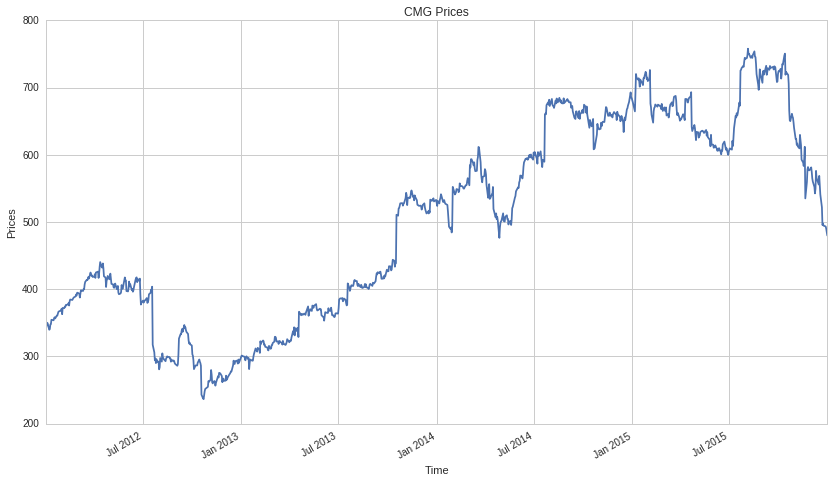

In [509]:
prices.plot()
plt.title(symbol+" Prices")
plt.xlabel("Time")
plt.ylabel("Prices");

In [510]:
print("Mean", prices.mean())
print("Std", prices.std())

Mean 501.6374393638171
Std 146.69720414599774


In [511]:
print("Descriptive Stats")
print(prices.describe())

Descriptive Stats
count    1006.000000
mean      501.637439
std       146.697204
min       236.240000
25%       371.605000
50%       521.280000
75%       646.753750
max       757.770000
Name: CMG, dtype: float64


#### Creating noisy series

In [512]:
noisy_series=prices+5*pd.Series(np.random.normal(0,5,len(prices)), index=prices.index)+20
noisy_series.head(5)

2012-01-03 00:00:00+00:00    344.127085
2012-01-04 00:00:00+00:00    375.257545
2012-01-05 00:00:00+00:00    349.857305
2012-01-06 00:00:00+00:00    332.295869
2012-01-09 00:00:00+00:00    369.253052
Freq: C, dtype: float64

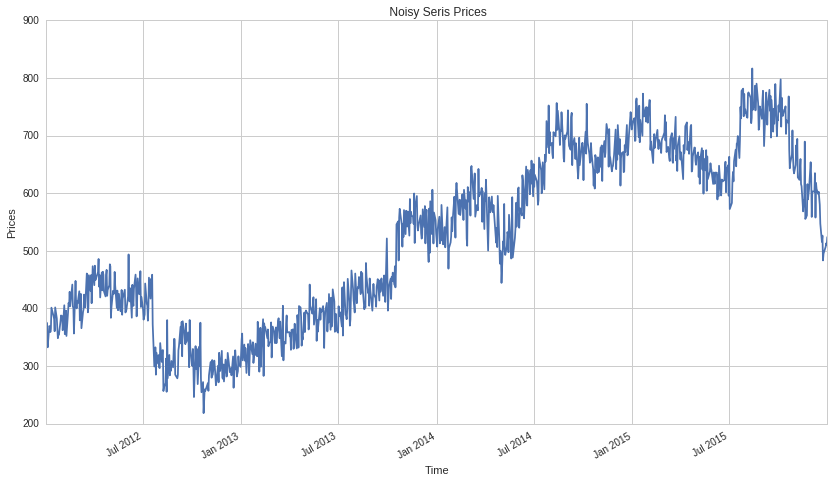

In [513]:
noisy_series.plot();
plt.title(" Noisy Seris Prices")
plt.xlabel("Time")
plt.ylabel("Prices");

##### Not providing index will yield NAN

In [514]:
empty_series=prices+pd.Series(np.random.normal(0,5,len(prices)))
empty_series.head(10)

2012-01-03 00:00:00+00:00   NaN
2012-01-04 00:00:00+00:00   NaN
2012-01-05 00:00:00+00:00   NaN
2012-01-06 00:00:00+00:00   NaN
2012-01-09 00:00:00+00:00   NaN
2012-01-10 00:00:00+00:00   NaN
2012-01-11 00:00:00+00:00   NaN
2012-01-12 00:00:00+00:00   NaN
2012-01-13 00:00:00+00:00   NaN
2012-01-17 00:00:00+00:00   NaN
dtype: float64

In [515]:
add_returns=prices.diff()[1:]
multi_returns=prices.pct_change()[1:]

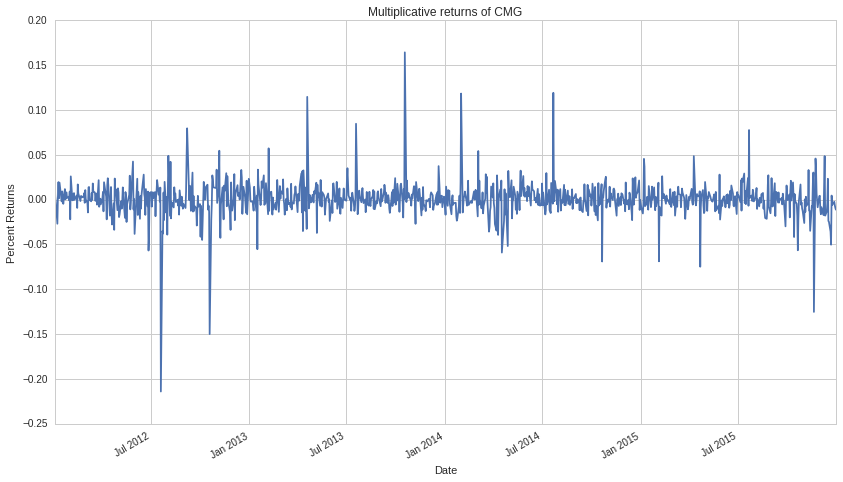

In [516]:
plt.title("Multiplicative returns of "+symbol)
plt.xlabel("Date")
plt.ylabel("Percent Returns")
multi_returns.plot();


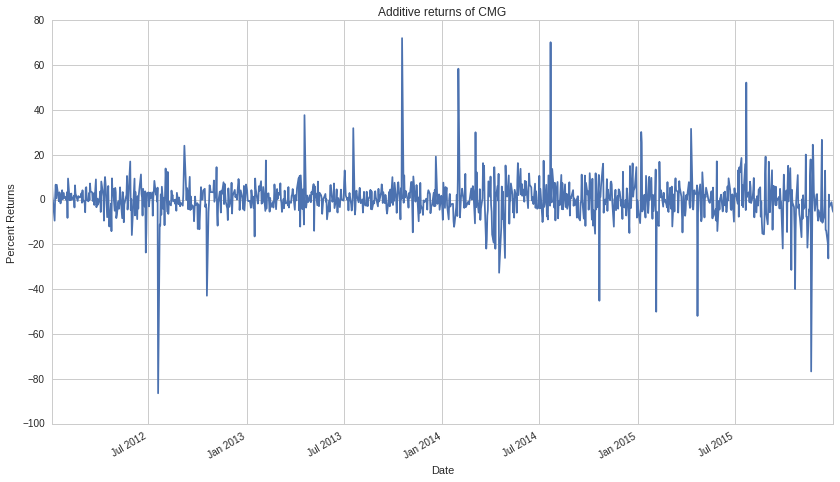

In [517]:
plt.title("Additive returns of "+symbol)
plt.xlabel("Date")
plt.ylabel("Percent Returns")
add_returns.plot();

In [518]:
rolling_mean=prices.rolling(window=30, center=False).mean()
rolling_mean.name="30-Day Rolling Mean"

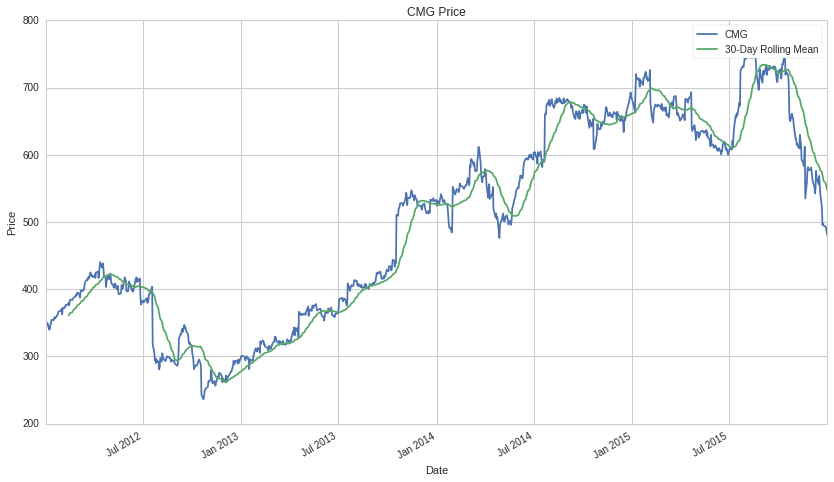

In [519]:
prices.plot()
rolling_mean.plot()
plt.title(symbol+" Price")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend();

In [520]:
rolling_std=prices.rolling(window=30, center=False).std()
rolling_std.name="30-Day Rolling Std"

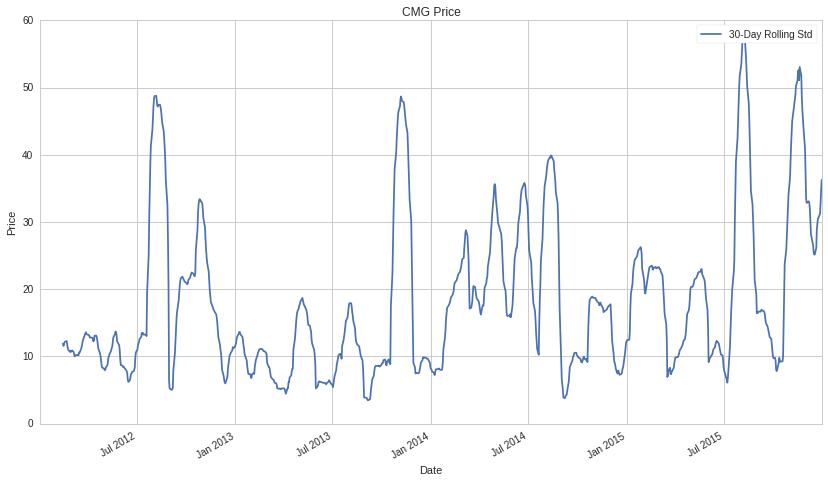

In [521]:
rolling_std.plot()
plt.title(symbol+" Price")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend();

##### NUmpy works on series as same as they work on arryas

In [522]:
s_1=pd.Series([2,4,8,10], name="Evens")
s_2=pd.Series([1,3,5,7,9], name="Odds")
numbers=pd.concat([s_1,s_2], axis=1)
print(numbers)

   Evens  Odds
0    2.0     1
1    4.0     3
2    8.0     5
3   10.0     7
4    NaN     9


In [523]:
print(numbers.columns)

Index(['Evens', 'Odds'], dtype='object')


In [524]:
numbers.index=pd.date_range('2016-01-01', periods=len(numbers))
print(numbers)

            Evens  Odds
2016-01-01    2.0     1
2016-01-02    4.0     3
2016-01-03    8.0     5
2016-01-04   10.0     7
2016-01-05    NaN     9


In [525]:
type(numbers.values)

<class 'numpy.ndarray'>

In [526]:
symbol=["CMG","MCD","SHAK","WFM"]
start="2012-01-01"
end="2016-01-01"

prices=get_pricing(symbol, start_date=start, end_date=end, fields="price")

In [527]:
prices.head()

,Equity(28016 [CMG]),Equity(4707 [MCD]),Equity(48543 [SHAK]),Equity(8158 [WFM])
2012-01-03 00:00:00+00:00,340.980,86.631,NaN,32.788
2012-01-04 00:00:00+00:00,348.740,87.166,NaN,33.650
2012-01-05 00:00:00+00:00,349.990,87.526,NaN,34.257
2012-01-06 00:00:00+00:00,348.950,88.192,NaN,34.319
2012-01-09 00:00:00+00:00,339.522,87.342,NaN,34.323


In [528]:
if isinstance(symbol, list):
    prices.columns=map(lambda x: x.symbol, prices.columns)
else:
    prices.name=symbol

In [529]:
prices.CMG.head()

2012-01-03 00:00:00+00:00    340.980
2012-01-04 00:00:00+00:00    348.740
2012-01-05 00:00:00+00:00    349.990
2012-01-06 00:00:00+00:00    348.950
2012-01-09 00:00:00+00:00    339.522
Freq: C, Name: CMG, dtype: float64

In [530]:
prices.loc[:, 'CMG'].head()

2012-01-03 00:00:00+00:00    340.980
2012-01-04 00:00:00+00:00    348.740
2012-01-05 00:00:00+00:00    349.990
2012-01-06 00:00:00+00:00    348.950
2012-01-09 00:00:00+00:00    339.522
Freq: C, Name: CMG, dtype: float64

In [531]:
prices.loc[:, ["CMG","MCD"]].head()

,CMG,MCD
2012-01-03 00:00:00+00:00,340.980,86.631
2012-01-04 00:00:00+00:00,348.740,87.166
2012-01-05 00:00:00+00:00,349.990,87.526
2012-01-06 00:00:00+00:00,348.950,88.192
2012-01-09 00:00:00+00:00,339.522,87.342


In [532]:
prices.loc['2015-12-15':'2015-12-22']

,CMG,MCD,SHAK,WFM
2015-12-15 00:00:00+00:00,555.64,116.96,41.510,32.96
2015-12-16 00:00:00+00:00,568.50,117.85,40.140,33.65
2015-12-17 00:00:00+00:00,554.91,117.54,38.500,33.38
2015-12-18 00:00:00+00:00,541.08,116.58,39.380,32.72
2015-12-21 00:00:00+00:00,521.71,117.70,38.205,32.98
2015-12-22 00:00:00+00:00,495.41,117.71,39.760,34.79


In [533]:
 prices.loc['2015-12-15':'2015-12-22',  ["CMG","MCD"]]

,CMG,MCD
2015-12-15 00:00:00+00:00,555.64,116.96
2015-12-16 00:00:00+00:00,568.50,117.85
2015-12-17 00:00:00+00:00,554.91,117.54
2015-12-18 00:00:00+00:00,541.08,116.58
2015-12-21 00:00:00+00:00,521.71,117.70
2015-12-22 00:00:00+00:00,495.41,117.71


In [534]:
prices.iloc[:2,1]

2012-01-03 00:00:00+00:00    86.631
2012-01-04 00:00:00+00:00    87.166
Freq: C, Name: MCD, dtype: float64

In [535]:
prices.iloc[:2]

,CMG,MCD,SHAK,WFM
2012-01-03 00:00:00+00:00,340.98,86.631,NaN,32.788
2012-01-04 00:00:00+00:00,348.74,87.166,NaN,33.650


In [536]:
prices.loc[prices.MCD>prices.WFM].head()

,CMG,MCD,SHAK,WFM
2012-01-03 00:00:00+00:00,340.980,86.631,NaN,32.788
2012-01-04 00:00:00+00:00,348.740,87.166,NaN,33.650
2012-01-05 00:00:00+00:00,349.990,87.526,NaN,34.257
2012-01-06 00:00:00+00:00,348.950,88.192,NaN,34.319
2012-01-09 00:00:00+00:00,339.522,87.342,NaN,34.323


In [537]:
prices.loc[(prices.MCD>prices.WFM) & ~prices.SHAK.isnull()].head()

,CMG,MCD,SHAK,WFM
2015-01-30 00:00:00+00:00,709.58,89.331,45.76,51.583
2015-02-02 00:00:00+00:00,712.69,89.418,43.50,52.623
2015-02-03 00:00:00+00:00,726.07,90.791,44.87,52.880
2015-02-04 00:00:00+00:00,675.99,90.887,41.32,53.138
2015-02-05 00:00:00+00:00,670.57,91.177,42.46,52.851


In [538]:
s_1=get_pricing('TSLA', start_date=start, end_date=end, fields='price')
prices.loc[:,'TSLA']=s_1
prices.head(5)

,CMG,MCD,SHAK,WFM,TSLA
2012-01-03 00:00:00+00:00,340.980,86.631,NaN,32.788,28.06
2012-01-04 00:00:00+00:00,348.740,87.166,NaN,33.650,27.71
2012-01-05 00:00:00+00:00,349.990,87.526,NaN,34.257,27.12
2012-01-06 00:00:00+00:00,348.950,88.192,NaN,34.319,26.94
2012-01-09 00:00:00+00:00,339.522,87.342,NaN,34.323,27.21


In [539]:
prices=prices.drop('TSLA', axis=1)
prices.head(5)

,CMG,MCD,SHAK,WFM
2012-01-03 00:00:00+00:00,340.980,86.631,NaN,32.788
2012-01-04 00:00:00+00:00,348.740,87.166,NaN,33.650
2012-01-05 00:00:00+00:00,349.990,87.526,NaN,34.257
2012-01-06 00:00:00+00:00,348.950,88.192,NaN,34.319
2012-01-09 00:00:00+00:00,339.522,87.342,NaN,34.323


In [540]:
df_1=get_pricing(['SPY','VXX'], start_date=start, end_date=end, fields='price')
df_2=get_pricing(['MSFT','AAPL','GOOG'], start_date=start, end_date=end, fields='price')
df_3=pd.concat([df_1,df_2], axis=1)
df_3.head()

,Equity(8554 [SPY]),Equity(51653 [VXX]),Equity(5061 [MSFT]),Equity(24 [AAPL]),Equity(46631 [GOOG])
2012-01-03 00:00:00+00:00,118.414,NaN,23.997,54.684,NaN
2012-01-04 00:00:00+00:00,118.498,NaN,24.498,54.995,NaN
2012-01-05 00:00:00+00:00,118.850,NaN,24.749,55.597,NaN
2012-01-06 00:00:00+00:00,118.600,NaN,25.151,56.194,NaN
2012-01-09 00:00:00+00:00,118.795,NaN,24.811,56.098,NaN


#### Misisng Data

In [541]:
filled0_prices=prices.fillna(0)
filled0_prices.head()

,CMG,MCD,SHAK,WFM
2012-01-03 00:00:00+00:00,340.980,86.631,0.0,32.788
2012-01-04 00:00:00+00:00,348.740,87.166,0.0,33.650
2012-01-05 00:00:00+00:00,349.990,87.526,0.0,34.257
2012-01-06 00:00:00+00:00,348.950,88.192,0.0,34.319
2012-01-09 00:00:00+00:00,339.522,87.342,0.0,34.323


In [542]:
billied_prices=prices.fillna(method='bfill')
billied_prices.head()

,CMG,MCD,SHAK,WFM
2012-01-03 00:00:00+00:00,340.980,86.631,45.76,32.788
2012-01-04 00:00:00+00:00,348.740,87.166,45.76,33.650
2012-01-05 00:00:00+00:00,349.990,87.526,45.76,34.257
2012-01-06 00:00:00+00:00,348.950,88.192,45.76,34.319
2012-01-09 00:00:00+00:00,339.522,87.342,45.76,34.323


In [543]:
dropped_prices=prices.dropna()
dropped_prices.head()

,CMG,MCD,SHAK,WFM
2015-01-30 00:00:00+00:00,709.58,89.331,45.76,51.583
2015-02-02 00:00:00+00:00,712.69,89.418,43.50,52.623
2015-02-03 00:00:00+00:00,726.07,90.791,44.87,52.880
2015-02-04 00:00:00+00:00,675.99,90.887,41.32,53.138
2015-02-05 00:00:00+00:00,670.57,91.177,42.46,52.851


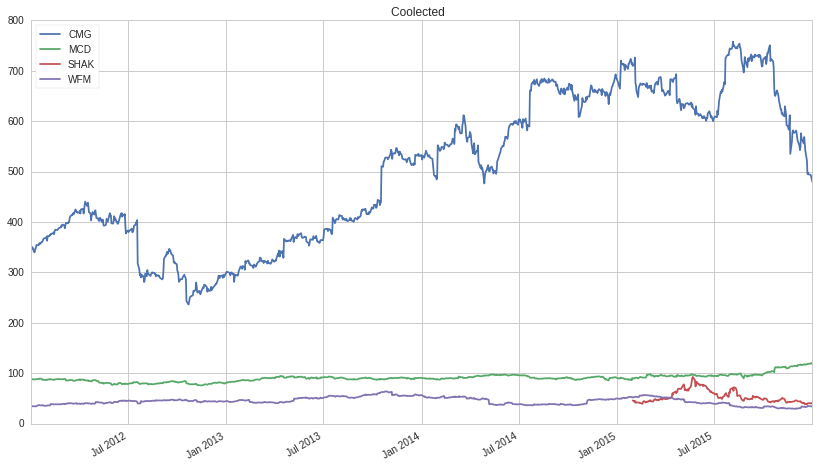

In [544]:
prices.plot()
plt.title("Coolected  ");

In [545]:
prices.mean(axis=0)

CMG     501.637439
MCD      90.433999
SHAK     53.530670
WFM      44.423044
dtype: float64

In [546]:
prices.std(axis=0)

CMG     146.697204
MCD       7.672937
SHAK     11.948689
WFM       7.550077
dtype: float64

In [547]:
prices.describe()

,CMG,MCD,SHAK,WFM
count,1006.000000,1006.000000,233.000000,1006.000000
mean,501.637439,90.433999,53.530670,44.423044
std,146.697204,7.672937,11.948689,7.550077
min,236.240000,75.387000,38.205000,29.150000
25%,371.605000,86.798000,NaN,38.555250
50%,521.280000,90.062000,NaN,43.928000
75%,646.753750,93.976250,NaN,50.766000
max,757.770000,120.030000,92.470000,63.732000


In [548]:
mult_returns=prices.pct_change()[1:]

In [549]:
mult_returns.head()

,CMG,MCD,SHAK,WFM
2012-01-04 00:00:00+00:00,0.022758,0.006176,NaN,0.026290
2012-01-05 00:00:00+00:00,0.003584,0.004130,NaN,0.018039
2012-01-06 00:00:00+00:00,-0.002972,0.007609,NaN,0.001810
2012-01-09 00:00:00+00:00,-0.027018,-0.009638,NaN,0.000117
2012-01-10 00:00:00+00:00,0.003470,0.000401,NaN,-0.002884


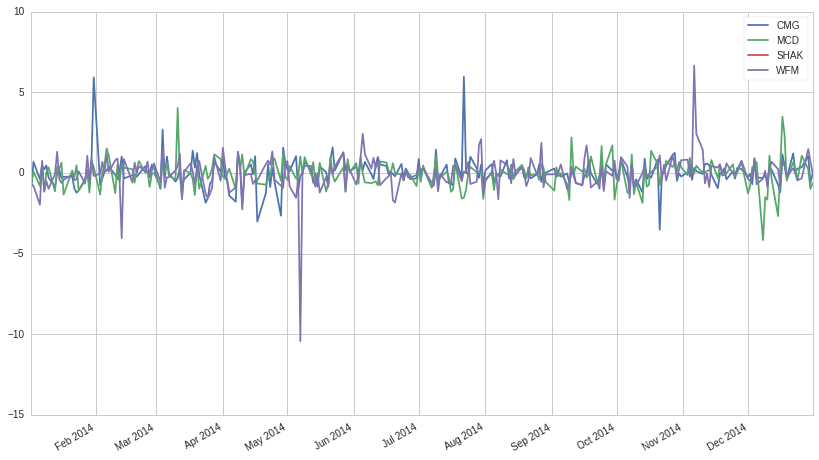

In [550]:
norm_returns=((mult_returns-mult_returns.mean(axis=0))/mult_returns.std(axis=0))
norm_returns.loc['2014-01-01':'2015-01-01'].plot();

In [551]:
rolling_mean=prices.rolling(window=30, center=False).mean()

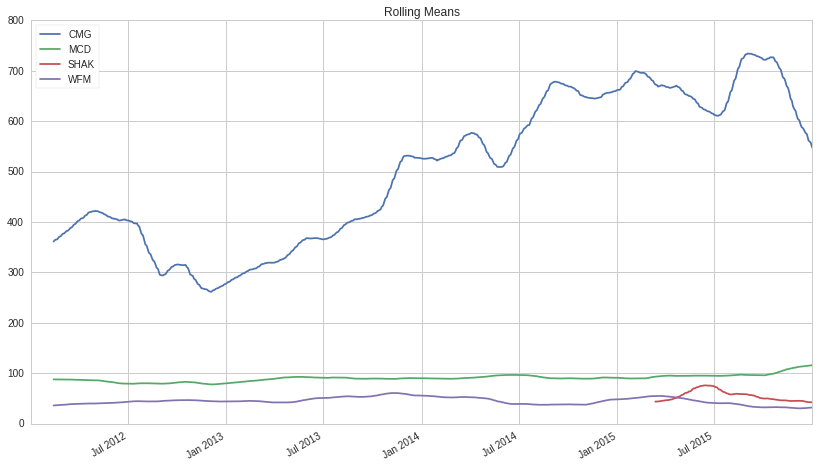

In [552]:
rolling_mean.plot();
plt.title("Rolling Means")

# Part 5: Plotting Data

In [553]:
start='2014-01-01'
end='2015-01-01'
data=get_pricing(['AAPL','MSFT'], fields='price',start_date=start, end_date=end)
data.head()

,Equity(24 [AAPL]),Equity(5061 [MSFT])
2014-01-02 00:00:00+00:00,77.405,36.155
2014-01-03 00:00:00+00:00,75.700,35.936
2014-01-06 00:00:00+00:00,76.107,35.167
2014-01-07 00:00:00+00:00,75.559,35.430
2014-01-08 00:00:00+00:00,76.043,34.797


In [554]:
data.columns[0].symbol

'AAPL'

In [555]:
data.columns=[e.symbol for e in data.columns]

In [556]:
data.head()

,AAPL,MSFT
2014-01-02 00:00:00+00:00,77.405,36.155
2014-01-03 00:00:00+00:00,75.700,35.936
2014-01-06 00:00:00+00:00,76.107,35.167
2014-01-07 00:00:00+00:00,75.559,35.430
2014-01-08 00:00:00+00:00,76.043,34.797


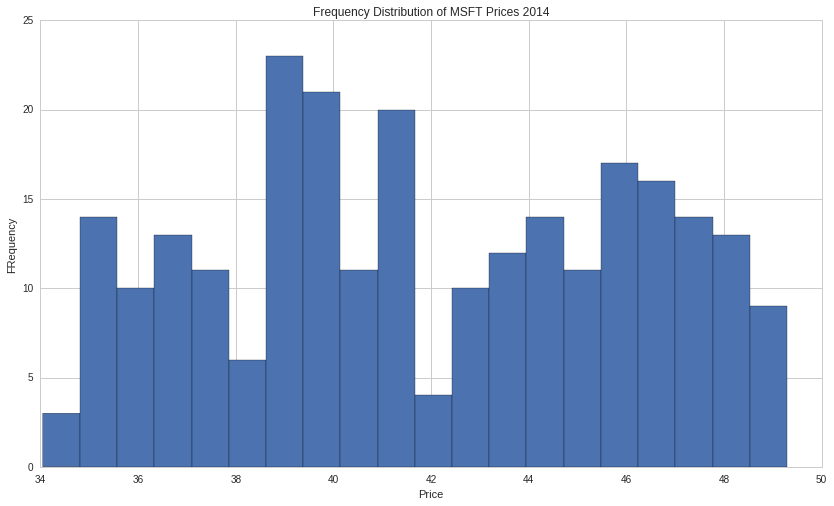

In [557]:
plt.hist(data['MSFT'], bins=20)
plt.xlabel("Price")
plt.ylabel("FRequency")
plt.title("Frequency Distribution of MSFT Prices 2014");

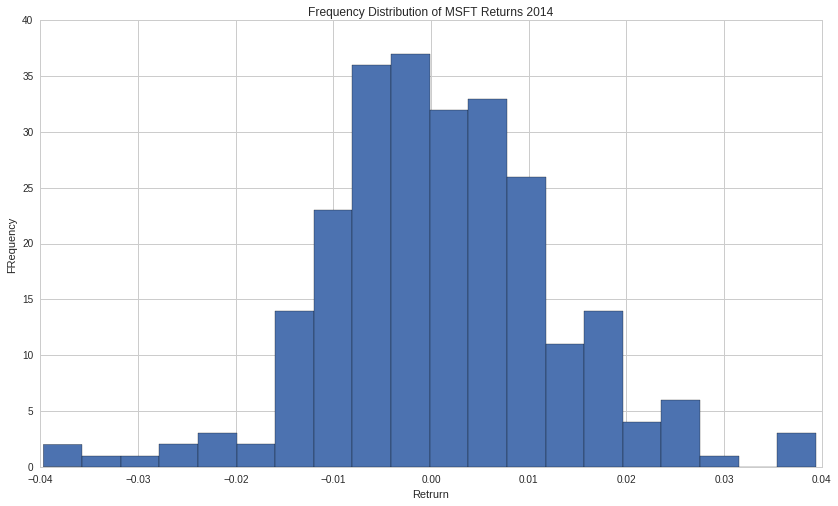

In [558]:
R =data['MSFT'].pct_change()[1:]
plt.hist(R, bins=20)
plt.xlabel("Retrurn")
plt.ylabel("FRequency")
plt.title("Frequency Distribution of MSFT Returns 2014");

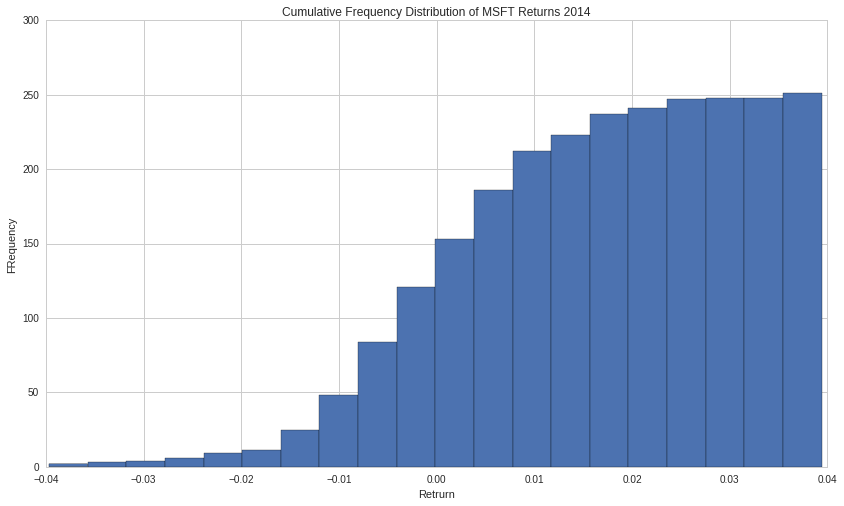

In [559]:
R =data['MSFT'].pct_change()[1:]
plt.hist(R, bins=20, cumulative=True)
plt.xlabel("Retrurn")
plt.ylabel("FRequency")
plt.title("Cumulative Frequency Distribution of MSFT Returns 2014");

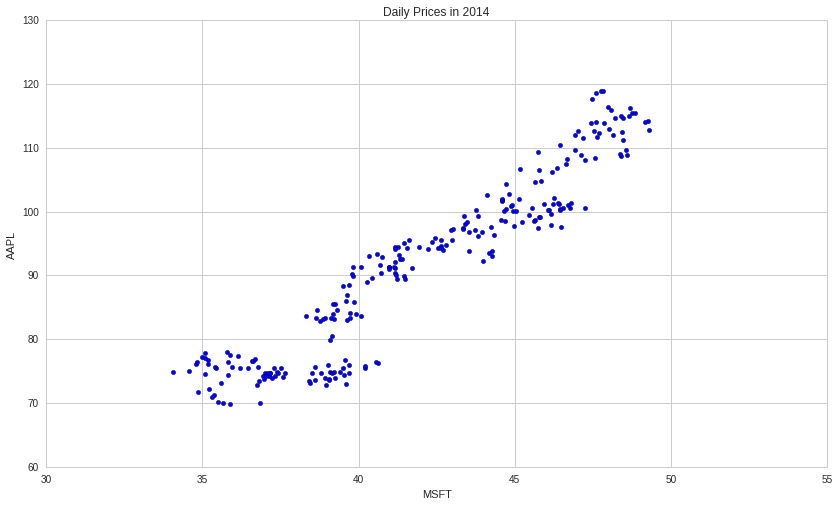

In [560]:
plt.scatter(data['MSFT'], data['AAPL'])
plt.xlabel("MSFT")
plt.ylabel("AAPL")
plt.title("Daily Prices in 2014");

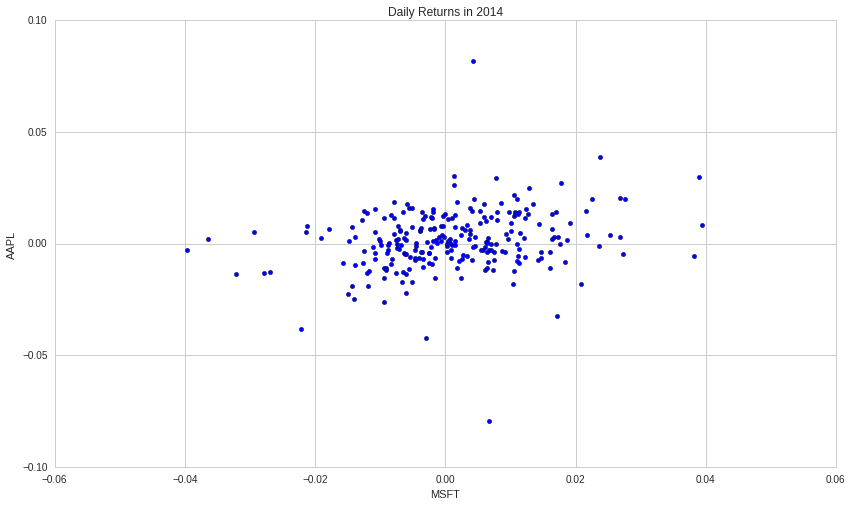

In [561]:
R_msft=data['MSFT'].pct_change()[1:]
R_aapl=data['AAPL'].pct_change()[1:]
plt.scatter(R_msft, R_aapl)
plt.xlabel("MSFT")
plt.ylabel("AAPL")
plt.title("Daily Returns in 2014");

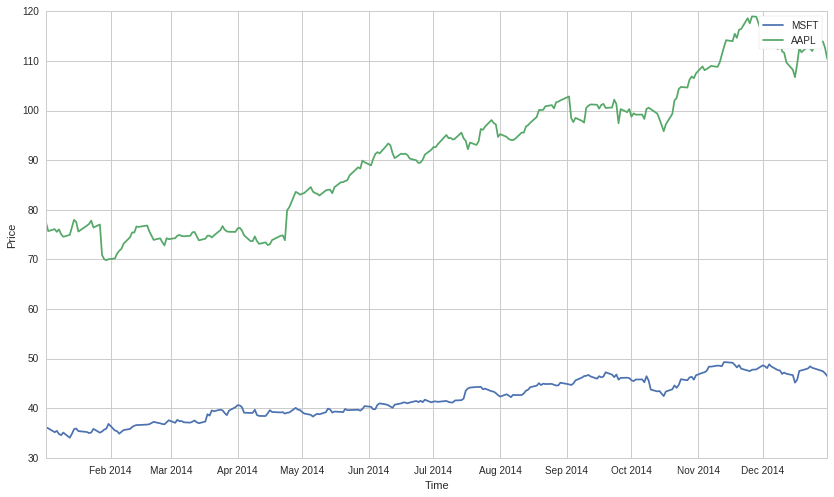

In [562]:
plt.plot(data['MSFT'])
plt.plot(data['AAPL'])
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend(['MSFT','AAPL']);

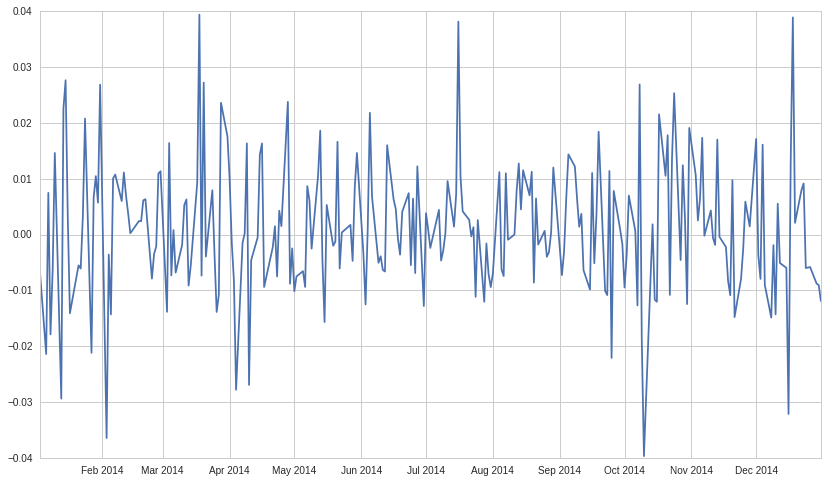

In [563]:
R= data['MSFT'].pct_change()[1:]
plt.plot(R);

#### NEVER TRUST A GRAPH 
#### NEVER PREDICT BASED ON PAST

# Part 6 Statistics

In [564]:
import scipy.stats as stats
import numpy as np

In [565]:
x1=[1,2,2,3,4,5,5,7]
x2=x1+[100]
x2

[1, 2, 2, 3, 4, 5, 5, 7, 100]

#### Mean

In [566]:
print("x1",x1, np.mean(x1))
print("x2",x2 ,np.mean(x2))

x1 [1, 2, 2, 3, 4, 5, 5, 7] 3.625
x2 [1, 2, 2, 3, 4, 5, 5, 7, 100] 14.3333333333


#### Median

In [567]:
print("x1",x1, np.median(x1))
print("x2",x2 ,np.median(x2))
#Not affected by outliers
#not good estimator
# Need it only for comparing

x1 [1, 2, 2, 3, 4, 5, 5, 7] 3.5
x2 [1, 2, 2, 3, 4, 5, 5, 7, 100] 4.0


#### Mode

In [568]:
print(stats.mode(x1)[0][0])

2


### Gemoetric Mean

In [569]:
print(stats.gmean(x1))
print(stats.gmean(x2)) 
# Negativ enumber will not work here
# Better than mean for outliers

3.09410402498
4.55253458762


In [570]:
ratios=R+np.ones(len(R))
R_G=stats.gmean(ratios)-1
print("Geometric Mean of returns", R_G)
#Compounding

Geometric Mean of returns 0.000999608741126


### Returns for geeometric Mean

In [571]:
returns=data['MSFT'].pct_change()[1:]
ratios=returns+np.ones(len(returns))
geo_mean=stats.gmean(ratios)-1
print("Geometric Mean:",geo_mean)
print("Start Price:", data['MSFT'][0])
print("End Price:", data['MSFT'][-1])
end_price=data['MSFT'][0]*(1+geo_mean)**len(returns)
print("End Price from GM",end_price)

Geometric Mean: 0.000999608741126
Start Price: 36.155
End Price: 46.46
End Price from GM 46.46


### Harmonic Mean

In [572]:
print(stats.hmean(x1))
print(stats.hmean(x2)) 
# Outlier not effect thhis

2.55902513328
2.86972365624


# Part 7: Variance, Measure of DIspersion

In [573]:
X =np.random.randint(100, size=20)
X=np.sort(X)
print("X:",X)
mu=np.mean(X)
print("Mean of X",mu)

X: [26 31 39 40 42 44 51 60 68 71 73 77 80 81 83 86 89 96 96 99]
Mean of X 66.6


### Range

In [574]:
print(np.ptp(X)) #ptp=Peak to Peak

73


### MAD

$$ \text{MAD}=\frac{\sum_{i=1}^n |X_i-\mu|}{n}$$

In [575]:
abs_dispersion = [np.abs(mu-x) for x in X]
MAD= np.sum(abs_dispersion)/len(abs_dispersion)
print(MAD)

19.98


  ### Variance and Standard Deviation

 $$ \sigma^2=\frac{\sum_{i=1}^n (X_i-\mu)^2}{n} $$

In [576]:
print(np.var(X))
print(np.std(X))

513.54
22.6614209616


#### Numbers lying from some k standard deviation

In [577]:
k=1.25
dist=k*np.std(X)
z=(X-mu)/np.std(X)
z

array([-1.7915911 , -1.5709518 , -1.21792892, -1.17380106, -1.08554534,
       -0.99728962, -0.68839461, -0.29124387,  0.061779  ,  0.19416258,
        0.2824183 ,  0.45892974,  0.59131332,  0.63544118,  0.7236969 ,
        0.85608047,  0.98846405,  1.29735907,  1.29735907,  1.42974265])

In [578]:
l=[x for x in X if abs(x-mu)<=dist]
print("Observation within", k, "std of mean", l)


Observation within 1.25 std of mean [39, 40, 42, 44, 51, 60, 68, 71, 73, 77, 80, 81, 83, 86, 89]


### Semivariance and semidviation

 $$ =\frac{\sum_{X_i<\mu}^n (X_i-\mu)^2}{n_<} $$

##### Only conceredd with values less than mean

In [579]:
lows=[e for e in X if e<=mu]
print(lows)
semivar=np.sum((lows-mu)**2/len(lows))
print("semivar", semivar)
print("std", np.sqrt(semivar))

[26, 31, 39, 40, 42, 44, 51, 60]
semivar 723.485
std 26.8976764796


#### Semivariance with target values

 $$ =\frac{\sum_{X_i<B}^n (X_i-B)^2}{n_{<B}} $$

In [580]:
B=19 ## nEED CORRECTION
lows=[e for e in X if e<=B]
print(lows)
semivar=np.sum((lows-mu)**2/len(lows))
print("semivar", semivar)
print("std", np.sqrt(semivar))

[]
semivar 0.0
std 0.0


# Part 8: Statiscal Moments
## Skewness and Kutosis

$$ f(x)= \frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{(x-u)^2}{2\sigma^2} }$$

$$ f(x)= \frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{z^2}{2} } $$

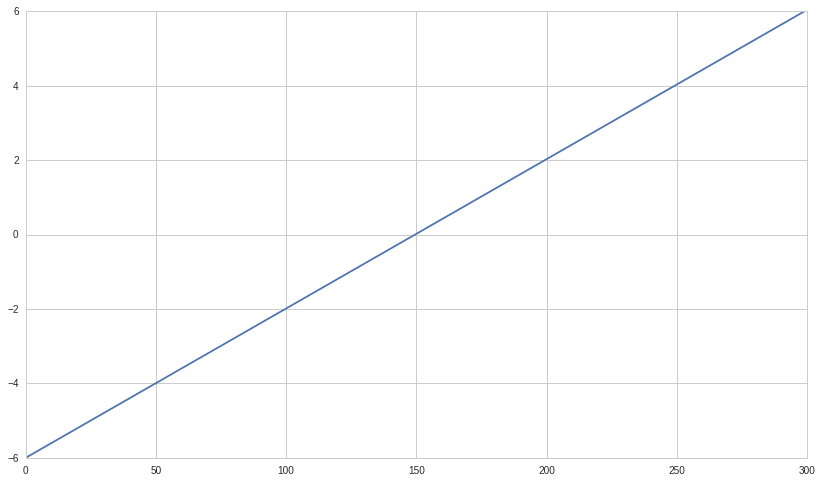

In [581]:
xs=np.linspace(-6,6,300)
plt.plot(xs);

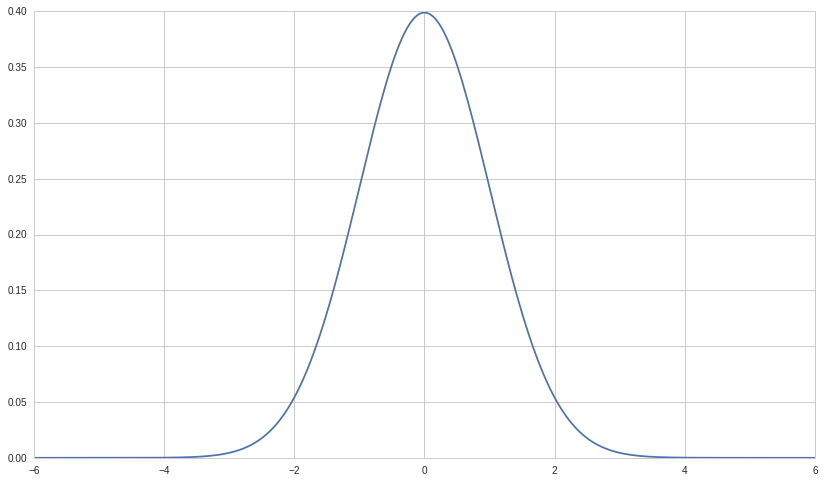

In [582]:
normal=stats.norm.pdf(xs)
plt.plot(xs, normal);

$$ S_k= \frac{n}{(n-1)(n-2)}z^3 $$ 

### Skew : Belly Fat

Start: 0.0962347736496
End: 4.99593677717


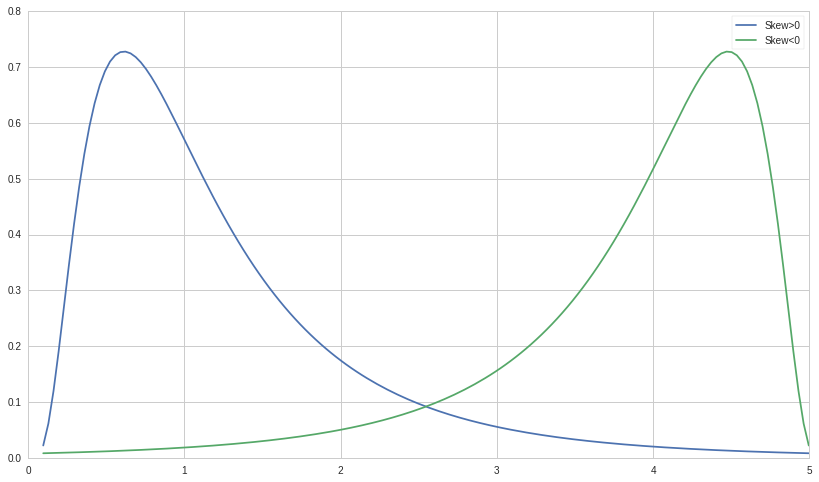

In [583]:
## tolearn
start=stats.lognorm.ppf(0.01,.7, loc=-.1)
end=stats.lognorm.ppf(0.99,.7, loc=-.1)
points=150

xs2=np.linspace(start,end, points)
print("Start:",start)
print("End:",end)

lognormal=stats.lognorm.pdf(xs2,0.7)


plt.plot(xs2,lognormal, label='Skew>0')

plt.plot(xs2,lognormal[::-1], label='Skew<0')

plt.legend();

In [584]:
stats.skew(returns)


0.08636785773638221

Skew -0.20832706122938052
Mean 0.0007325492623271022
Median 0.000805529770079


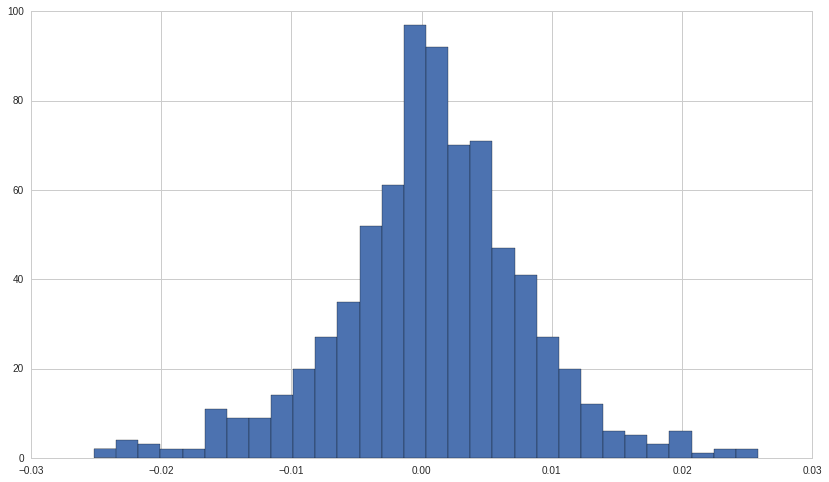

In [585]:
start='01-01-2012'
end='01-01-2015'

pricing=get_pricing('SPY', fields='price', start_date=start, end_date=end)
returns=pricing.pct_change()[1:]

print("Skew", stats.skew(returns))
print("Mean", np.mean(returns))
print("Median", np.median(returns))

plt.hist(returns, 30);

### Kutosis: Peak

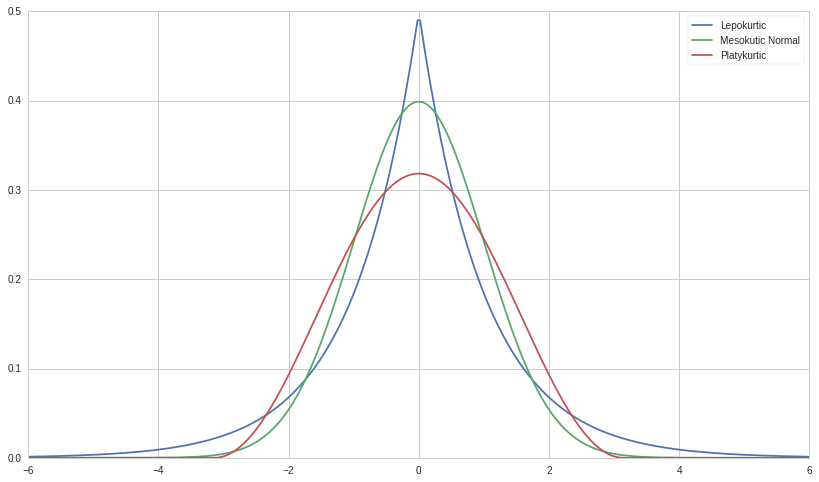

In [586]:
plt.plot(xs, stats.laplace.pdf(xs), label="Lepokurtic") 
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.laplace.html
plt.plot(xs, normal, label="Mesokutic Normal")
plt.plot(xs, stats.cosine.pdf(xs), label="Platykurtic")
plt.legend();

In [587]:
stats.kurtosis(returns)


1.2143197999692719

### Other Standardization Moments


$$=\frac{E[(X-E(X))^k]}{\sigma^k} $$

### Normality test: Jarque Bera
* How same is your distribution to normal distribution

* Hypothesis

1. H0: Normal
2. H1: Not Normal

p val < 0.05 means reject h0 and go for H1

In [588]:
# Scipy and Statsmodels are diffrent

from statsmodels.stats.stattools import jarque_bera
#?jarque_bera

In [589]:
N=1000
M=1000

pvalues=np.ndarray((N))

for i in range(N):
    X=np.random.normal(0,1,M)
    _, pvalue, _,_=jarque_bera(X)
    pvalues[i]=pvalue
    
num_significant=len(pvalues[pvalues<.05])

print("Times we are wrong:",float(num_significant/N))

Times we are wrong: 0.057


In [590]:
 _, pvalue, _,_=jarque_bera(returns)
    
if pvalue <0.05:
    print("Not normal")
else:
    print("Normal")

Not normal


# Part 9: Linear Correlation Analysis


$$ r=\frac{Cov(X,Y)}{\sigma_x\sigma_y}$$

### CORRELATION VS COVARIANCE


* Covarince is nothing in itself
* Corelation :  How much is the change in X is explained by Y

In [591]:
X=np.random.rand(50)
Y=2*X+np.random.normal(0,0.1,50)
np.cov(X,Y)

array([[ 0.08834697,  0.18401652],
       [ 0.18401652,  0.39297426]])

In [592]:
np.cov(X,Y)[0,1]

0.18401651982262074

In [593]:
X=np.random.rand(50)
Y=2*X+4
print("Covarince:",np.cov(X,Y))
print("Corelation:",np.corrcoef(X,Y))

Covarince: [[ 0.08534659  0.17069318]
 [ 0.17069318  0.34138635]]
Corelation: [[ 1.  1.]
 [ 1.  1.]]


### Why both covatinace and corrrelation return matrix in np

Covarinace Matrix
\begin{bmatrix}
VAR_x & coVAR_(xy) \\
coVAR_(xy) & VAR_y  
\end{bmatrix}

 Correlation Matrix
\begin{bmatrix}
1_{xx} & corel_(xy) \\
corel_(xy) & 1_{yy}  
\end{bmatrix} 

In [594]:
cov_matrix=np.cov(X,Y)

error=cov_matrix[0,0]-X.var(ddof=1)

print("error", str(error))    # Sanity check that coVar is same as var

error 0.0


r= -0.112586397145
Covar= -0.117769631495
r from covar= -0.11488407872


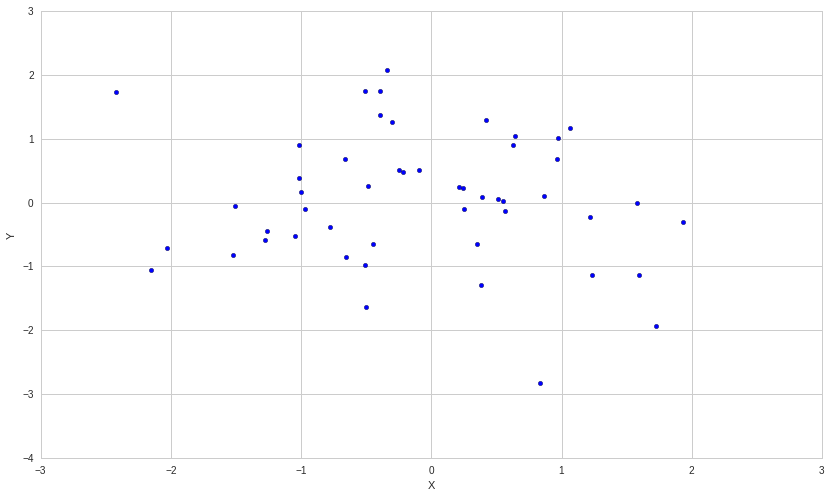

In [595]:
X=np.random.randn(50)
Y=np.random.randn(50)

plt.xlabel("X")
plt.ylabel("Y")
plt.scatter(X,Y);
  
print("r=", np.corrcoef(X,Y)[0,1])
print("Covar=", np.cov(X,Y)[0,1])
print("r from covar=", np.cov(X,Y)[0,1]/( np.std(X)*np.std(Y) ))

r= 0.98721738833
Covar= 1.02828430201
r from covar= 1.00736468197


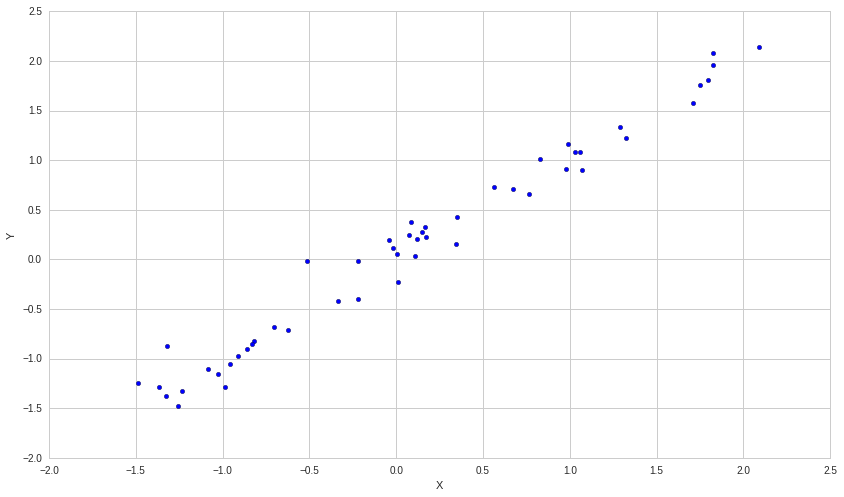

In [596]:
X=np.random.randn(50)
Y=X+np.random.normal(0,.2,50)

plt.xlabel("X")
plt.ylabel("Y")
plt.scatter(X,Y);
  
print("r=", np.corrcoef(X,Y)[0,1])
print("Covar=", np.cov(X,Y)[0,1])
print("r from covar=", np.cov(X,Y)[0,1]/( np.std(X)*np.std(Y) ))

r= -0.985428191193
Covar= -0.978513624142
r from covar= -1.00553897061


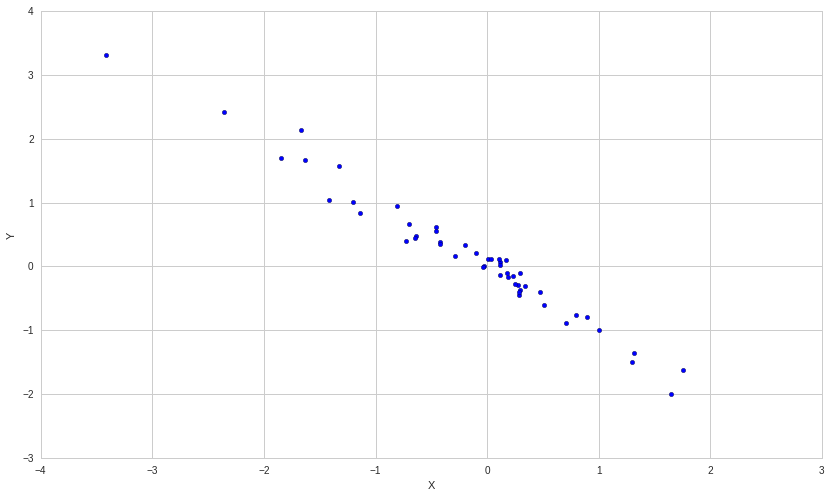

In [597]:
X=np.random.randn(50)
Y=-X+np.random.normal(0,.2,50)

plt.xlabel("X")
plt.ylabel("Y")
plt.scatter(X,Y);
  
print("r=", np.corrcoef(X,Y)[0,1])
print("Covar=", np.cov(X,Y)[0,1])
print("r from covar=", np.cov(X,Y)[0,1]/( np.std(X)*np.std(Y) ))

                               SPY    LRCX    AAPL
2013-02-04 00:00:00+00:00  143.771  41.650  60.357
2013-02-05 00:00:00+00:00  145.223  42.265  62.486
2013-02-06 00:00:00+00:00  145.339  42.265  62.413
2013-02-07 00:00:00+00:00  145.146  42.077  64.281
2013-02-08 00:00:00+00:00  145.911  42.305  65.205


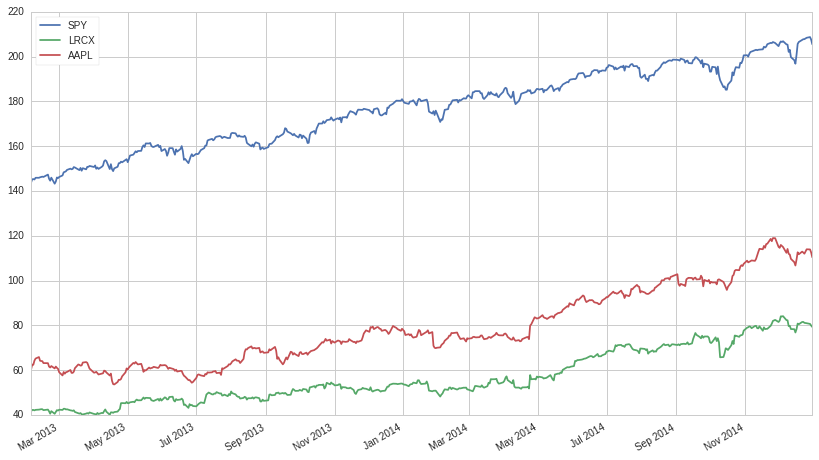

In [598]:
start='02-02-2013'
end='01-01-2015'
symbols=['SPY','LRCX', 'AAPL']
df=get_pricing(symbols=symbols, fields='price', \
                  start_date=start, end_date=end)
df.columns=symbols
print(df.head())
df.plot();

r= 0.974287005726


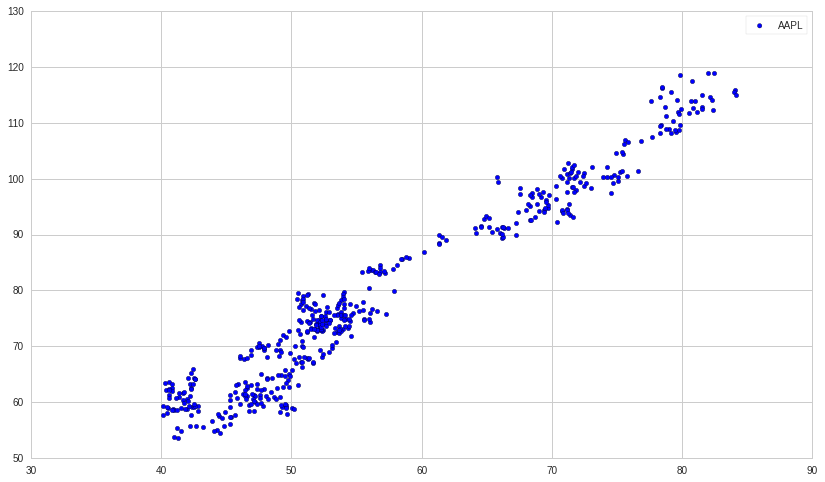

In [599]:
a1=df['LRCX']
a2=df['AAPL']
bench=df['SPY']

plt.scatter(a1,a2)
plt.legend();

print("r=",np.corrcoef(a1,a2)[0,1]) 

#### Correlation changes over time

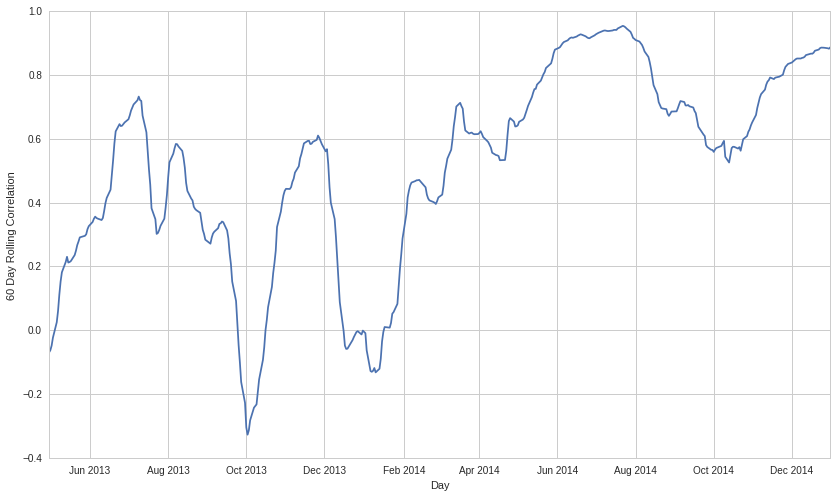

In [600]:
rolling_correlation=a1.rolling(60).corr(a2)
plt.plot(rolling_correlation)
plt.xlabel("Day")
plt.ylabel("60 Day Rolling Correlation");

#### Coorelation is based on linear model but we may have non linear relationship


0.48201006455191958

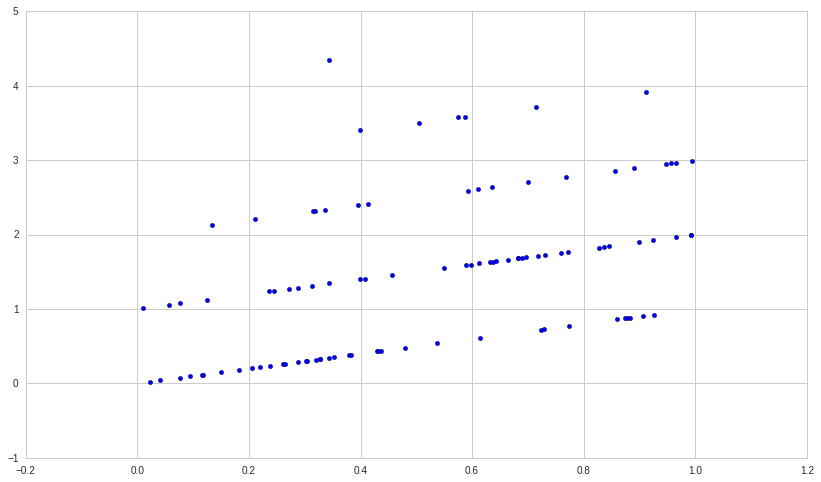

In [601]:
X=np.random.rand(100)
Y=X+np.random.poisson(size=100)

plt.scatter(X,Y) 

np.corrcoef(X,Y)[0,1]


## Spearman Rank Corrrelation

In [602]:
import scipy.stats as stats
import math

In [603]:
l=[10,9,5,7,5]
print("Data",l)
print("Ranks", list(stats.rankdata(l, method='average')))

Data [10, 9, 5, 7, 5]
Ranks [5.0, 4.0, 1.5, 3.0, 1.5]


#### Notice that Spearman rank cor removes the outlier to just a small rank

$$ RankCor=1-6\frac{\sum_{i=1}^ndiff^2}{n(n^2-1)} $$

In [604]:
def compare_correlation_spearman_rank(n):
    X=np.random.poisson(size=n)
    Y=np.exp(X)+np.random.poisson(size=n)
    
    Xrank=stats.rankdata(X, method='average')
    Yrank=stats.rankdata(Y, method='average')
    
    diffs=Xrank-Yrank
    r_s=1-6*sum(diffs*diffs)/(n*(n**2-1))
    c_c=np.corrcoef(X,Y)[0,1]
    
    return r_s, c_c

experiments=1000

spearman_dist=np.ndarray(experiments)
correlation_dist=np.ndarray(experiments)

for i in range(experiments):
    r_s, c_c=compare_correlation_spearman_rank(experiments)
    spearman_dist[i]=r_s
    correlation_dist[i]=c_c
print("Spearman Rank",np.mean(spearman_dist))
print("Normal Correl", np.mean(correlation_dist))

Spearman Rank 0.874206891007
Normal Correl 0.635950623278


#### Spearman correlation is highger !!! which is good

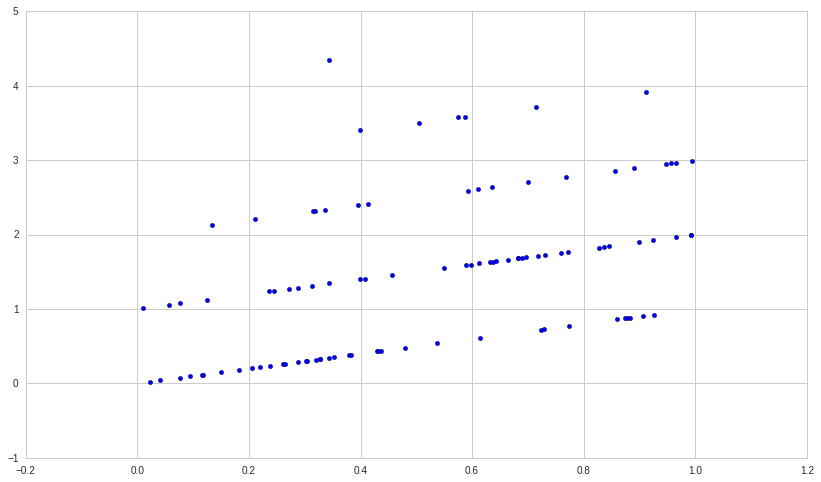

In [605]:
plt.scatter(X,Y);

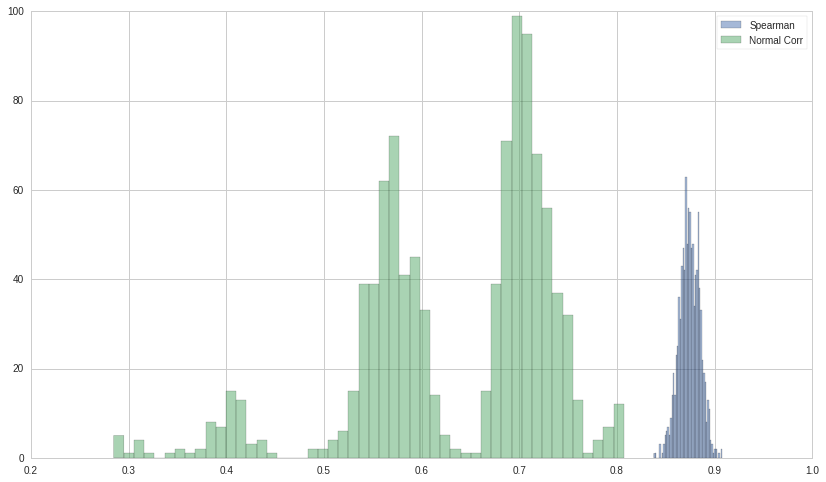

In [606]:
plt.hist(spearman_dist, bins=50, alpha=0.5)
plt.hist(correlation_dist, bins=50, alpha=0.5);
plt.legend(["Spearman", "Normal Corr"]);

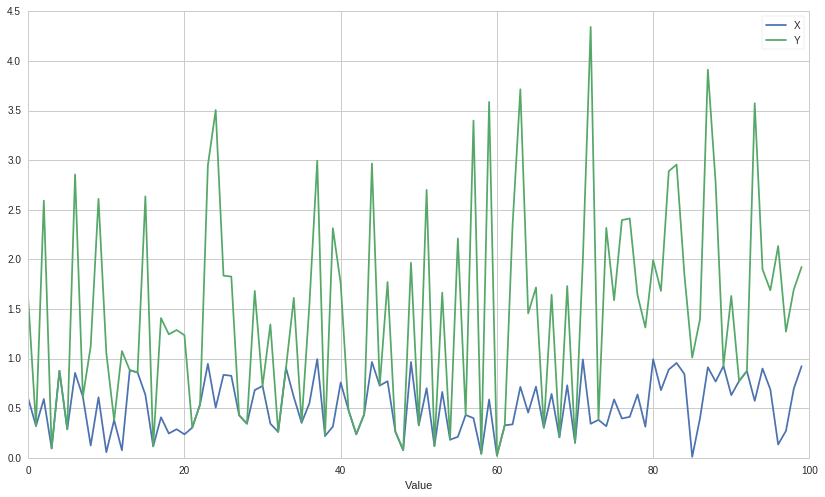

In [607]:
plt.plot(X)
plt.plot(Y)
plt.xlabel("Time")
plt.xlabel("Value")
plt.legend(["X","Y"]);

### When neither of this correlation work

In [608]:
n=100

X=np.random.rand(n)
Xrank=stats.rankdata(X,method='average')
# Shifting Y by 2 now Y is late by 2 steps
Yrank=stats.rankdata([1,1]+list(X[:(n-2)]),method='average')

diffs=Xrank-Yrank
r_s=1-6*sum(diffs*diffs)/(n*(n**2-1))

print(r_s)

0.0590609060906


#### So no relations now just by moving 2 time steps

In [609]:
np.random.seed(161)
X=np.random.rand(10)
Y=np.random.rand(10)

r_s=stats.spearmanr(X,Y) ##scipy
print("Spearman:",r_s[0])
print("P avlue:",r_s[1])

Spearman: 0.236363636364
P avlue: 0.510885317515


#### Hypothessi

1. H0: Not corr
2. H1: corr

p<0.05 reject H0

throw awway this data

$$ \text{Sharpe Ratio} = \frac{r_x-r_f}{\sigma_{x}} $$
$$ x=asset $$
$$ rx=return $$


#### Does Expense ratio increases or lowers the sharpe ratios

Spearman -0.369696969697
p-value 0.293050075293


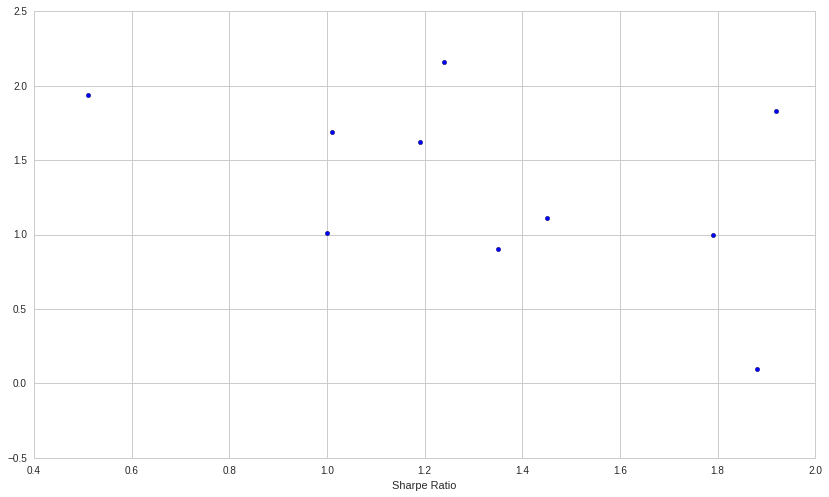

In [610]:
expense=[1.35, 1.79, 1.45, 1.88, 1., 1.01, 1.19, 1.92, 0.51, 1.24]
sharpe=[0.9, 1.,1.11,0.1, 1.01,1.69, 1.62, 1.83, 1.94, 2.16]

plt.scatter(expense, sharpe)
plt.xlabel("Expense Ratio")
plt.xlabel("Sharpe Ratio")

r_S = stats.spearmanr(expense, sharpe)
# r_S=np.corrcoef(expense, sharpe)
print("Spearman",r_S[0])
print("p-value",r_S[1]) # If p is not <0.05 leave it

Scores:
 A      -0.000624
AA           NaN
AAC     0.002750
AAL     0.005677
AAMC   -0.020559
AAME    0.002202
AAN     0.003750
AAOI    0.004674
AAON    0.004232
AAP     0.003884
AAPL   -0.001854
AAT     0.001703
AAU    -0.000585
AAV     0.003971
AAVL    0.017222
AAWW    0.004991
AB     -0.000934
ABAC   -0.006204
ABAX    0.000614
ABB    -0.002108
ABBV   -0.002466
ABC    -0.000335
ABCB    0.002274
ABCD   -0.000634
ABCO    0.008130
ABCW    0.004931
ABDC   -0.000231
ABEV    0.000035
ABG     0.000803
ABGB   -0.003586
dtype: float64
Walk Forward Returss:
 A      -0.003617
AA           NaN
AAC    -0.008565
AAL    -0.004467
AAMC   -0.030477
AAME   -0.000417
AAN     0.001978
AAOI   -0.009533
AAON   -0.000076
AAP     0.000248
AAPL    0.003944
AAT     0.005083
AAU     0.012741
AAV    -0.005292
AAVL   -0.018860
AAWW   -0.003459
AB     -0.003870
ABAC   -0.010432
ABAX    0.003495
ABB    -0.004947
ABBV   -0.003981
ABC     0.002656
ABCB   -0.001967
ABCD    0.019824
ABCO   -0.001434
ABCW   -0.001041
A

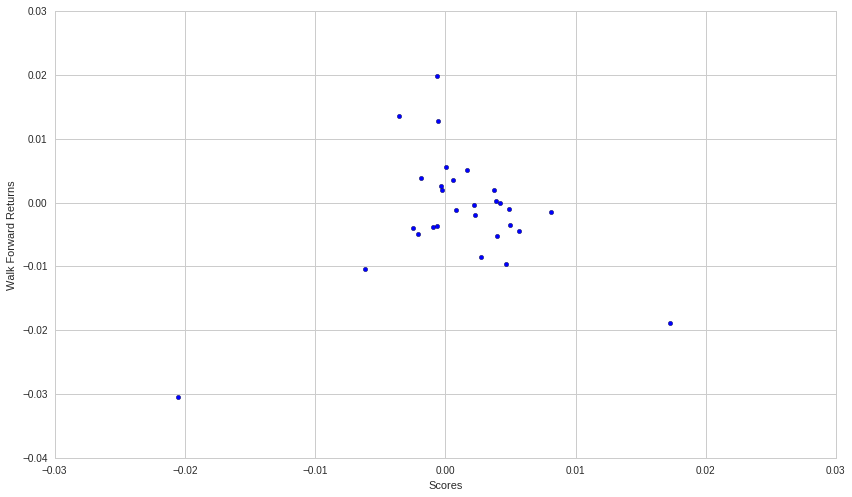

In [611]:
symbol_list = ['A', 'AA', 'AAC', 'AAL', 'AAMC', 'AAME', \
               'AAN', 'AAOI', 'AAON', 'AAP', 'AAPL', 'AAT',\
               'AAU', 'AAV', 'AAVL', 'AAWW', 'AB', 'ABAC', \
               'ABAX', 'ABB', 'ABBV', 'ABC', 'ABCB','ABCD',\
               'ABCO', 'ABCW', 'ABDC', 'ABEV', 'ABG', 'ABGB']

start='2014-12-01'
end='2015-01-01'

historical_returns=get_pricing(symbol_list, fields='price', start_date=start, end_date=end).pct_change()[1:]
historical_returns.columns=symbol_list

scores=np.mean(historical_returns)

print("Scores:\n",scores)

start='2015-01-01'
end='2015-02-01'

walk_forward_returns=get_pricing(symbol_list, fields='price', start_date=start, end_date=end).pct_change()[1:]
walk_forward_returns.columns=symbol_list
walk_forward_returns=np.mean(walk_forward_returns)


print("Walk Forward Returss:\n", walk_forward_returns)


plt.scatter(scores, walk_forward_returns)
plt.xlabel("Scores")
plt.ylabel("Walk Forward Returns")

r_s=stats.spearmanr(scores,walk_forward_returns)
print("Coorelation",r_s[0])
print("p-value",r_s[1])


## LOng SHrt staretdgy
# Longing the top 
# Shorting the bottom
# Not depend on market


## But our algo test months vs month companrisson

### Hence previous month does not affect the new month

# Part 10: Instability of Estimates

-0.269516110326
0.0271090734904
-0.0206160591117
-0.0386439735132
STD:

1.2363048015
1.11070814511
0.935001477698
1.00320285616


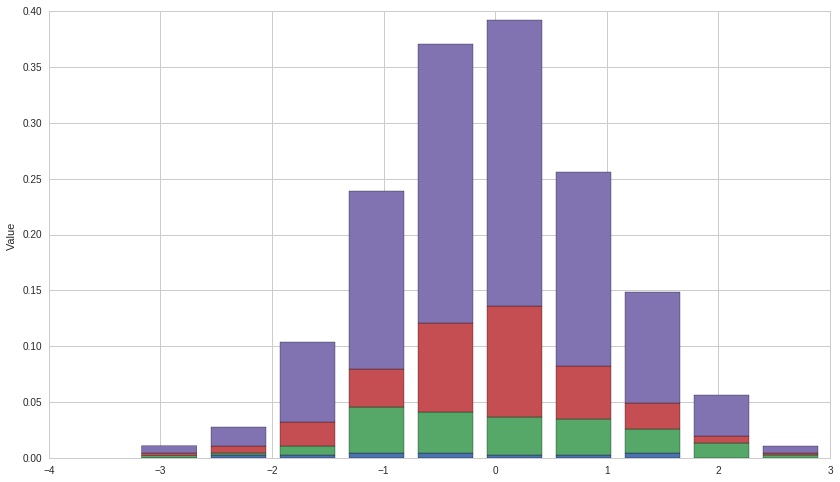

In [612]:
np.random.seed(123)

normal=np.random.randn(500)
print(np.mean(normal[:10]))
print(np.mean(normal[:100]))
print(np.mean(normal[:250]))
print(np.mean(normal))


plt.hist([normal[:10],normal[10:100],normal[100:250],normal], normed=1, histtype='bar', stacked=True)
plt.ylabel('Frequncy')
plt.ylabel('Value');

print("STD:\n")
for n in [normal[:10],normal[10:100],normal[100:250],normal]:
    print(np.std(n))


#### More samples leads to central tendency 
#### Less leads to high variance

#### Mean is deceptive in case in case data is not normal 
#### At such case we use jarque bara test

Mean 0.0997745424945
STD 5.28026755406


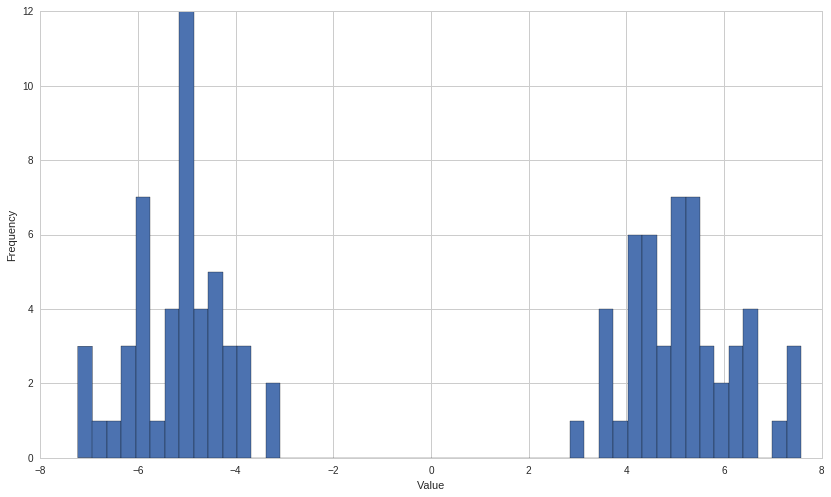

In [613]:
### Distribution with two modes 

def bimodal(n):
    X=np.zeros((n))
    for i in range(n):
        if np.random.binomial(1,0.5)==0:
            X[i]=np.random.normal(-5,1)
        else:
            X[i]=np.random.normal(5,1)
    return X

X=bimodal(100)

plt.hist(X, bins=50)
plt.ylabel("Frequency")
plt.xlabel("Value")
print("Mean", np.mean(X))
print("STD", np.std(X))

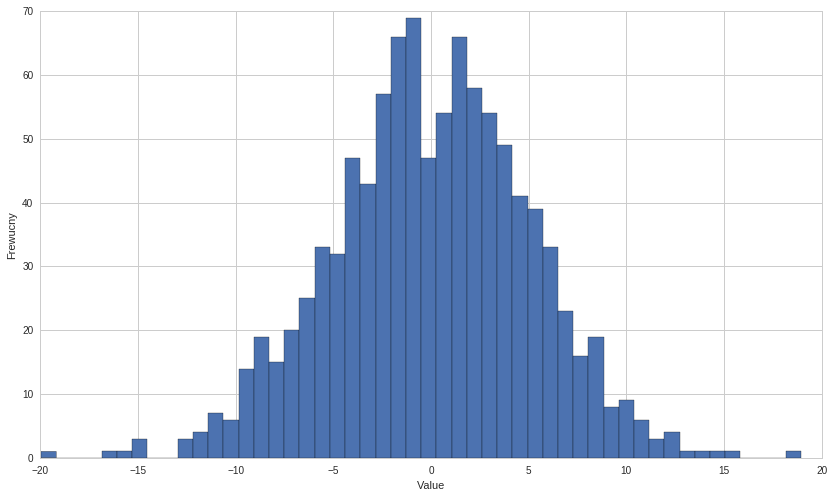

In [614]:
mu=np.mean(X)
sigma=np.std(X)

N=np.random.normal(mu, sigma, 1000)

plt.hist(N, bins=50)
plt.ylabel("Frewucny")
plt.xlabel("Value")

In [615]:
from statsmodels.stats.stattools import jarque_bera
jarque_bera(X)

(14.267083427141815,
 0.00079788848485343243,
 -0.022644158787543573,
 1.1501218983929635)

## Moving Sharpe Ratio

In [616]:
def sharpe_ratio(asset, riskfree):
    return np.mean(asset-riskfree)/np.std(asset-riskfree)

[   0.  100.  200.  300.  400.  500.  600.]


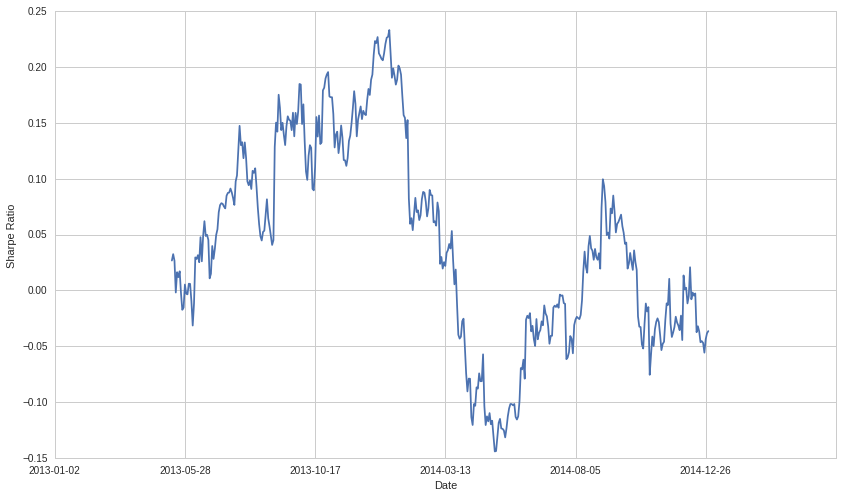

In [617]:
start = '2013-01-01'
end='2015-01-01'

treasury_ret=get_pricing('BIL', fields='price', start_date=start, end_date=end).pct_change()[1:]
pricing=get_pricing('AMZN', fields='price', start_date=start, end_date=end)

returns =pricing.pct_change()[1:]


running_sharpe=[sharpe_ratio(returns[i-90:i], treasury_ret[i-90:i]) for i in range(90, len(returns))]

_, ax1=plt.subplots()

ax1.plot(range(90, len(returns)), running_sharpe[:])
ticks=ax1.get_xticks()
print(ticks)

ax1.set_xticklabels(\
    [pricing.index[i].date() for i in ticks[:-1]]
                   )
plt.xlabel('Date')
plt.ylabel('Sharpe Ratio');

### WHat is the danger: sharpe ratio changes and moves above or below std with low std

Mean of running Sharpe Ratio 0.0419463839331
Std of running Sharpe Ratio 0.0904421725489


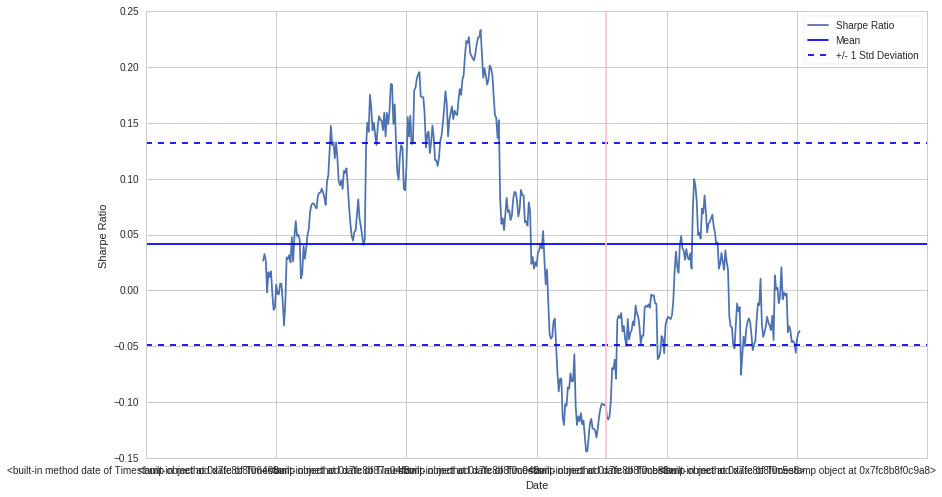

In [618]:
mean_rs=np.mean(running_sharpe)
std_rs=np.std(running_sharpe)

plt.figure(figsize=(20,20))
_,ax2=plt.subplots()
ax2.set_xticklabels([pricing.index[i].date for i in ticks[:-1]])
ax2.plot( range(90, len(returns)), running_sharpe)

ax2.axhline(mean_rs)
ax2.axhline(mean_rs+std_rs, linestyle="--")
ax2.axhline(mean_rs-std_rs, linestyle="--")

ax2.axvline(len(returns)-150, color="pink" )


plt.xlabel("Date")
plt.ylabel("Sharpe Ratio")
plt.legend(["Sharpe Ratio","Mean", "+/- 1 Std Deviation"])

print("Mean of running Sharpe Ratio", mean_rs)
print("Std of running Sharpe Ratio", std_rs);

In [619]:
range(90, len(returns)-100)

range(90, 403)

## Moving Average: 
### Long: is like runnign behind the market
### Short: is like too much noise
### How to choose window?

## Every time all signals are changing to calcaute the change and discredit them if they are not giving signal

# Part 11: Exercise Random Variables

In [620]:
class DiscreteRandomVariable:
    def __init__(self, a=0, b=0):
        self.variableType=""
        self.low=a
        self.high=b
    def draw(self, numberOfSamples):
        samples =np.random.randint(self.low, self.high, numberOfSamples)
        return samples


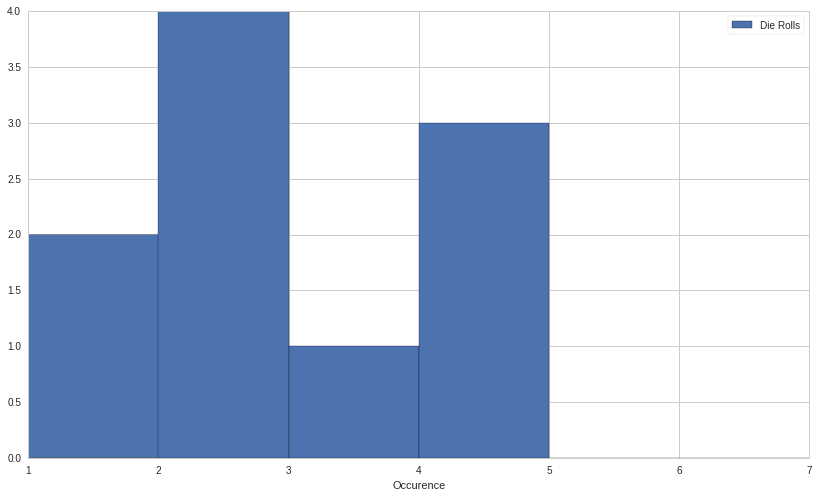

In [621]:
DieRolls=DiscreteRandomVariable(1,6)
plt.hist(DieRolls.draw(10), bins=[1,2,3,4,5,6,7], align="mid")
plt.xlabel("Vlaue")
plt.xlabel("Occurence")
plt.legend(['Die Rolls']);

* Descrite variable not giving un equal probablity at low sampling

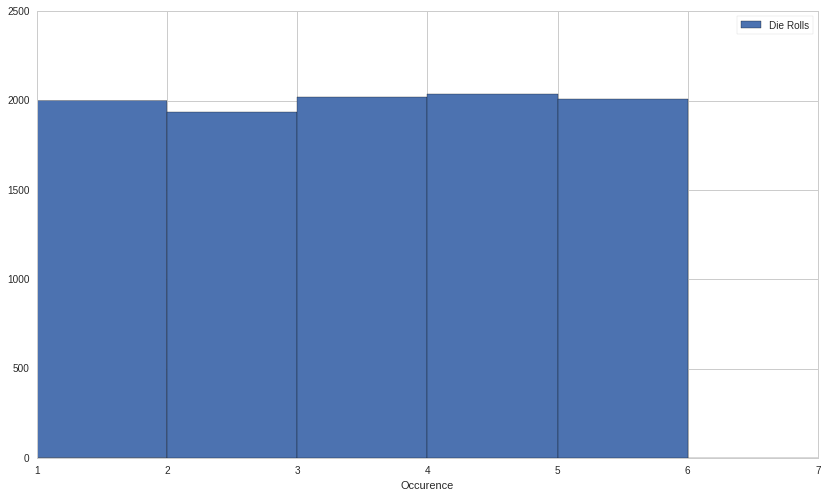

In [622]:
DieRolls=DiscreteRandomVariable(1,6)
plt.hist(DieRolls.draw(10000), bins=[1,2,3,4,5,6,7], align="mid")
plt.xlabel("Vlaue")
plt.xlabel("Occurence")
plt.legend(['Die Rolls']);

* descrte variable giving equal probablity at large sampleing

In [623]:
class BionomialRandomVariable(DiscreteRandomVariable):
    def __init__(self, numberOfTrails=10, probablityOfSuccess=0.5):
        self.varaibleType="Bionomial"
        self.numberOfTrails=numberOfTrails
        self.probablityOfSuccess=probablityOfSuccess
        
    def draw(self, numberOfSamples):
        samples=np.random.binomial(self.numberOfTrails, self.probablityOfSuccess, numberOfSamples)
        return samples
    

np.random.binomial(N, p, size = q)
np.random.binomial(1, p, size = q)
np.random.binomial(N,p, size= q)
1st and 3rd are similar, i can see. These two are binomial random number generator

And, 2nd one is bernoulli random number generator

Explanation of binomial:

A binomial random variable counts how often a particular event occurs in a fixed number of tries or trials.

Here,

n = number of trials
p = probability event of interest occurs on any one trial
size = number of times you want to run this experiment
Suppose, You wanna check how many times you will get six if you roll dice 10 times. Here,

n = 10,
p = (1/6) # probability of getting six in each roll
But, You have to do this experiment multiple times.

Let, In 1st experiment, you get 3 six

In 2nd expwriment, you get 2 six

In 3rd experiment, you get 2 six

In Pth experiment, you get 2 six, here P is the size

Explanation of bernoulli:

Suppose you perform an experiment with two possible outcomes: either success or failure. Success happens with probability p, while failure happens with probability 1-p. A random variable that takes value 1 in case of success and 0 in case of failure is called a Bernoulli random variable.

Here,

n = 1, Because you need to check whether it is success or failure one time
p = probability of success
size = number of times you will check this

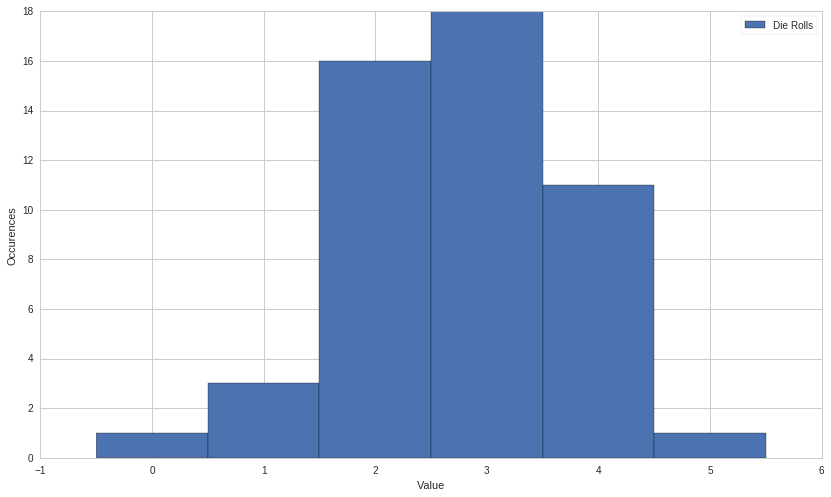

In [624]:
StockProbablities=BionomialRandomVariable(5,0.5)
plt.hist(StockProbablities.draw(50), bins=[0,1,2,3,4,5,6], align="left")
plt.xlabel("Value")
plt.ylabel("Occurences")
plt.legend(['Die Rolls']);

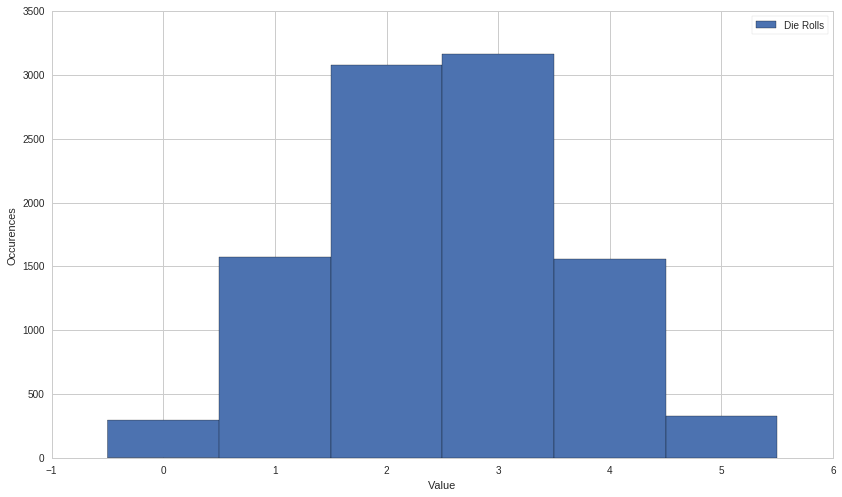

In [625]:
plt.hist(StockProbablities.draw(10000), bins=[0,1,2,3,4,5,6], align="left")
plt.xlabel("Value")
plt.ylabel("Occurences")
plt.legend(['Die Rolls']);

* Increasing sample made it more symetrical

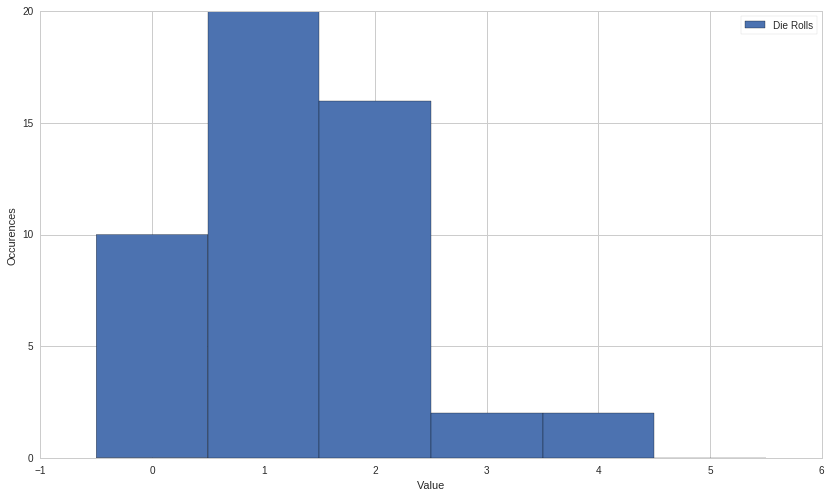

In [626]:
StockProbablities=BionomialRandomVariable(5,0.25)
plt.hist(StockProbablities.draw(50), bins=[0,1,2,3,4,5,6], align="left")
plt.xlabel("Value")
plt.ylabel("Occurences")
plt.legend(['Die Rolls']);

## Continuos Random Variable

In [627]:
class ContinuousRandomVariable:
    def __init__(self, a=0, b=1):
        self.variableType=""
        self.low=a
        self.high=b
    def draw(self, numberOfSamples):
        samples=np.random.uniform(self.low, self.high, numberOfSamples)
        return samples

## Uniform Distribution 
### PDF

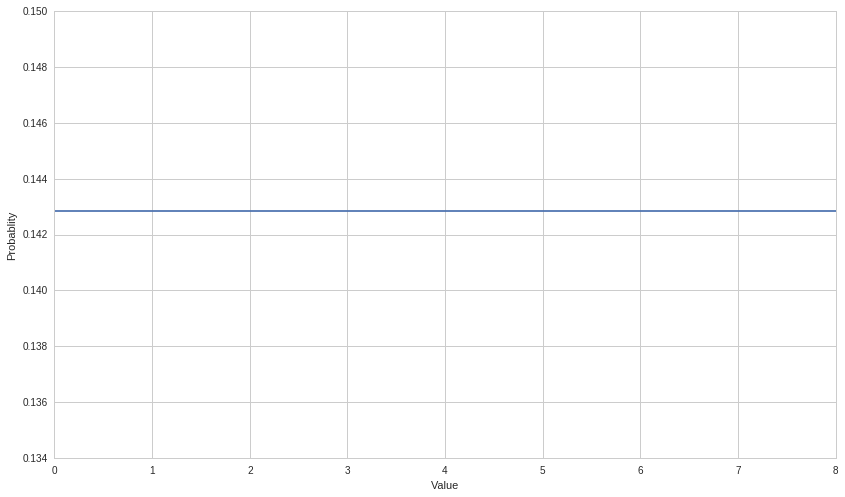

In [628]:
a=0.0
b=08.0

x=np.linspace(a,b, 100)
y=[1/(b-1) for i in x]
plt.plot(x,y)
plt.xlabel("Value")
plt.ylabel('Probablity');

### CDF

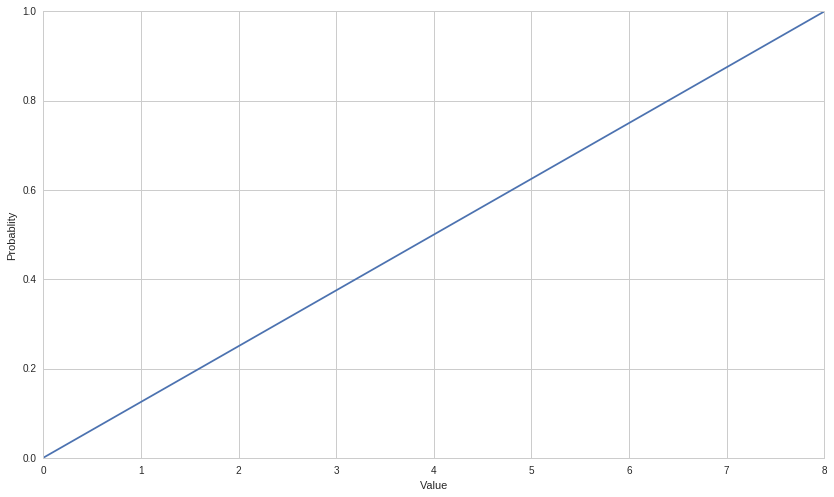

In [629]:
y = [(i-a)/(b-a) for i in x]
plt.plot(x,y)
plt.xlabel("Value")
plt.ylabel("Probablity");

## Normal Distribution

In [630]:
def make_it_normal(x,mu,sigma, dist="generate"):
    if dist == "calculate":
        mu=np.mean(x)
        sigma=np.std(x)
    elif dist =="generate":
        pass
    else:
        print("Specify for:\n1. generate or \n2. calculate ")
        exit()
        
    z=(x-mu)/sigma
    numerator=np.exp((-z**2)/2)
    denomenator=sigma*np.sqrt(2*3.14)
    f_x=numerator/denomenator
    return f_x



In [631]:
class NormalRandomVariable(ContinuousRandomVariable):
    def __init__(self, mean=0, variance=1):
        ContinuousRandomVariable.__init__(self)
        self.variableType="Normal"
        self.mean =mean ##setting this to zero
        self.standardDeviation=np.sqrt(variance)
        return 
    def draw(self, numberOfSamples):
        samples=np.random.normal(self.mean, self.standardDeviation, numberOfSamples)
        return samples

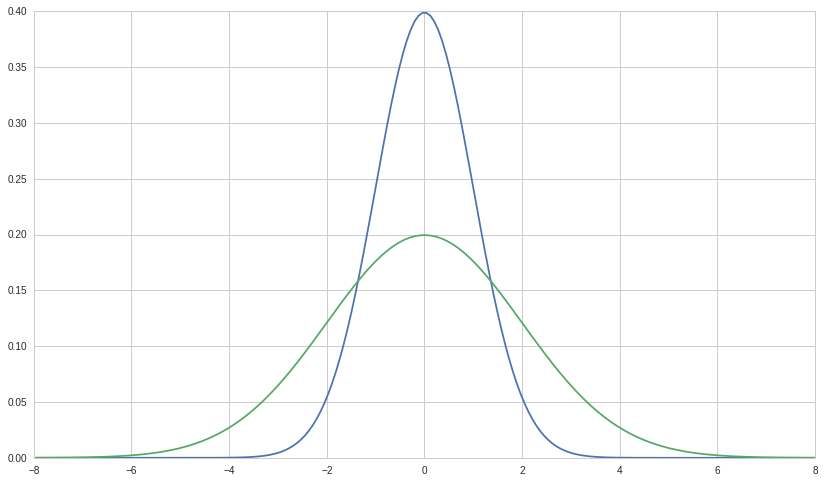

In [632]:
x=np.linspace(-8,8, 200)
y=make_it_normal(x,0,1)
y2=make_it_normal(x,0,2)
plt.plot(x,y, x, y2);

## COnverting Binomial to Normal

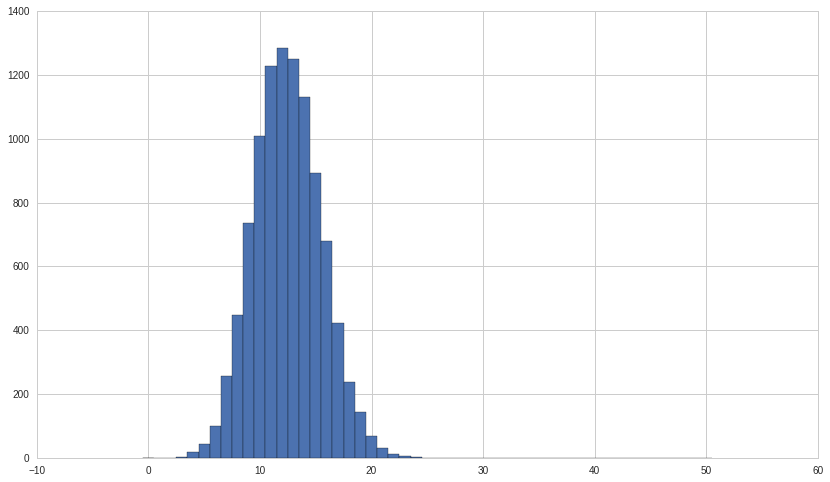

In [633]:
n=50
p=0.25
X=BionomialRandomVariable(n,p)
X_sampels=X.draw(10000)
Z_sampels=(X_sampels-n*p)/np.sqrt(n*p*(1-p))
##tolearn
plt.hist(X_sampels, bins=range(0,n+2), align="left");

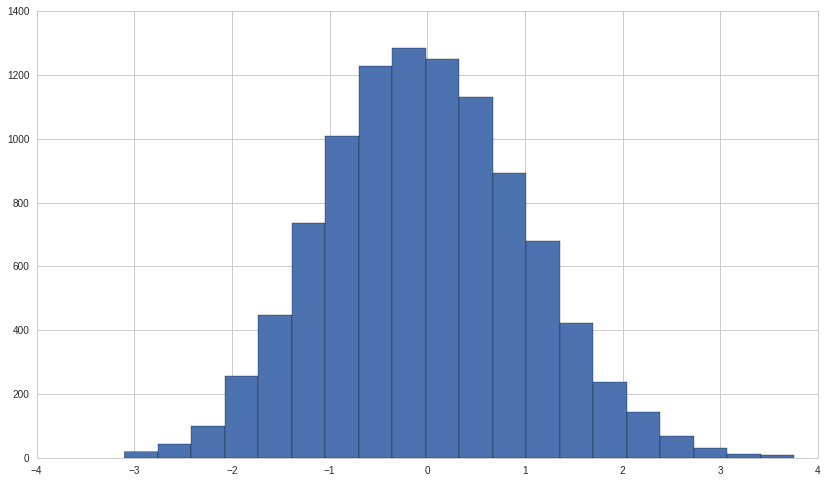

In [634]:
plt.hist(Z_sampels, bins=20);

## Simulating normally distributed returns of stock

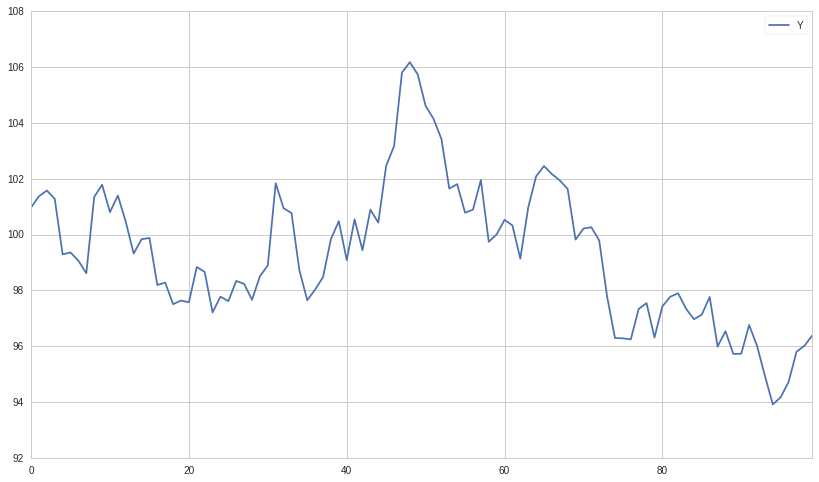

In [635]:
Y_initial=100
X=NormalRandomVariable(0,1)
Y_returns=X.draw(100)
Y = pd.Series(np.cumsum(Y_returns), name = 'Y') + Y_initial
Y.plot()
plt.legend();

# Part 12: Linear Regression

In [636]:
from statsmodels import  regression, stats
import statsmodels.api as sm

import scipy as sp
import math

In [637]:
def linreg(X,Y):
    x=sm.add_constant(X)
    model=regression.linear_model.OLS(Y,x).fit()
    return model.params[0], model.params[1]

## Biased Noise: Due to small sample size

Slope 0.00907250382269 INtercept -0.402077440853


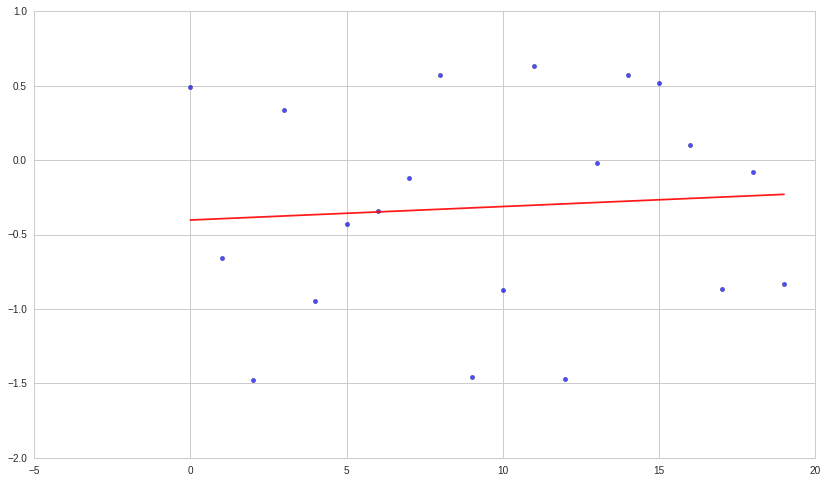

In [638]:
np.random.seed(107)
rand=np.random.randn(20)

xs=np.arange(20)
a, b, = linreg(xs, rand)

print("Slope",b, "INtercept", a)

plt.scatter(xs, rand, alpha=0.7)
Y_hat=xs*b+a
plt.plot(xs, Y_hat, "r", alpha=0.9);

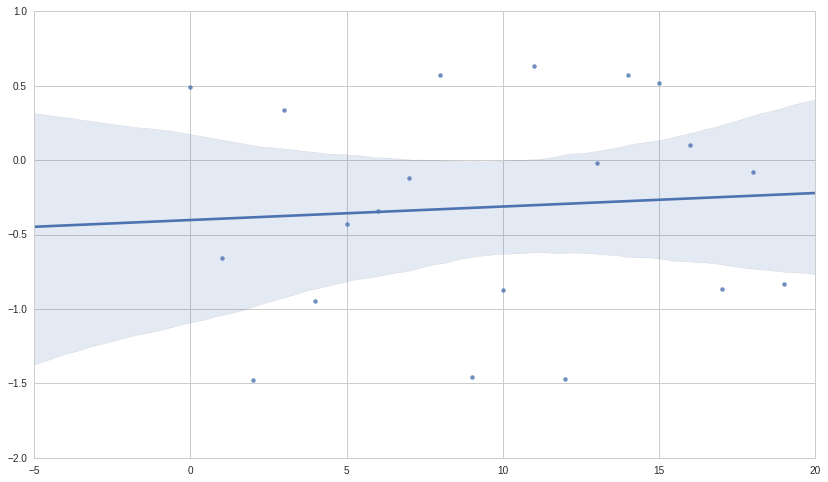

In [639]:
import seaborn as sns
sns.regplot(xs, rand);

Slope -4.37247316227e-06 INtercept -0.0131414497587


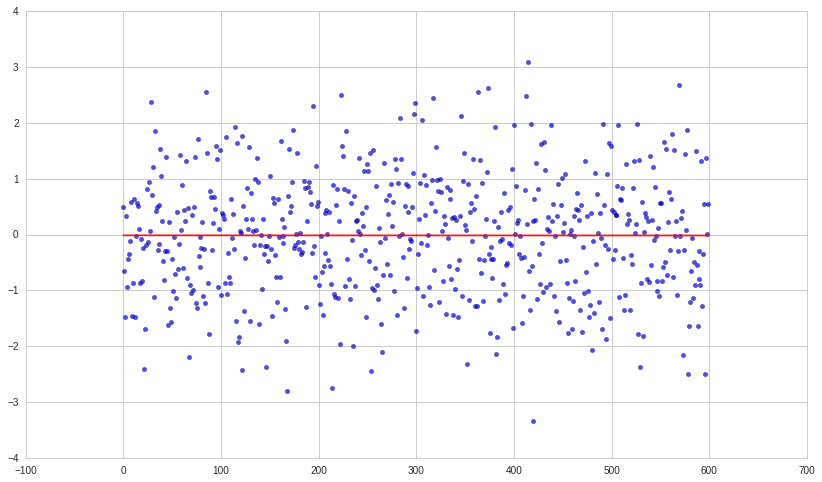

In [640]:
n=600
np.random.seed(107)
rand=np.random.randn(n)

xs=np.arange(n)
a, b, = linreg(xs, rand)

print("Slope",b, "INtercept", a)

plt.scatter(xs, rand, alpha=0.7)
Y_hat=xs*b+a
plt.plot(xs, Y_hat, "r", alpha=0.9);

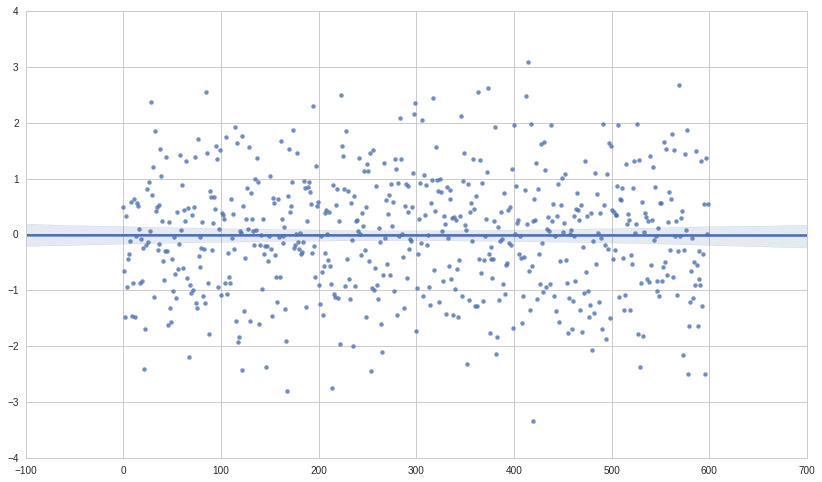

In [641]:
sns.regplot(xs, rand);

# Part 13: MLE (Maximum Liklihood E

## Regime CHanges

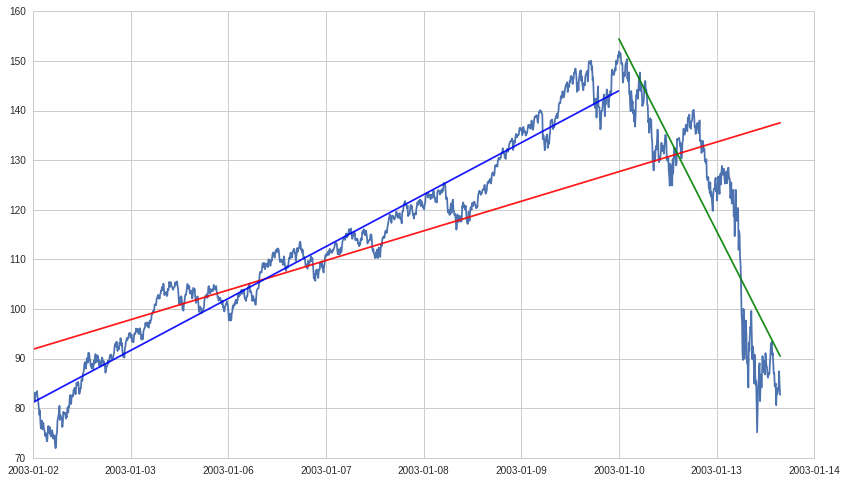

In [642]:
start = '2003-01-01'
end = '2009-02-01'

pricing=get_pricing('SPY', fields='price', start_date=start, end_date=end)

breakpoint=1200
xs=np.arange(len(pricing))
xs2=np.arange(breakpoint)
xs3=np.arange(len(pricing)-breakpoint)

a, b =linreg(xs, pricing)
a2, b2 =linreg(xs2, pricing[:breakpoint])
a3, b3 =linreg(xs3, pricing[breakpoint:])

Y_hat=xs*b+a
Y_hat2=xs2*b2+a2
Y_hat3=xs3*b3+a3

_,ax=plt.subplots()

ax.set_xticklabels(labels=[i.date() for i in pricing.index]) 
plt.plot(xs, pricing)
plt.plot(xs, Y_hat,'r', alpha=0.9)
plt.plot(xs2, Y_hat2,'b', alpha=0.9)
plt.plot(xs3+breakpoint, Y_hat3,'g', alpha=0.9);


#### Fit reg line for small winow but not small enough for noise
#### You need to find the structural break

In [643]:
#https://www.statsmodels.org/devel/diagnostic.html

model=regression.linear_model.OLS(pricing, sm.add_constant(xs))
model_x=model.fit()
residuals=model_x.resid[1]

stats.diagnostic.breaks_cusumolsresid(residuals)

(1.0, 0.26999967167735456, [(1, 1.63), (5, 1.36), (10, 1.22)])

## Multicolloinearity

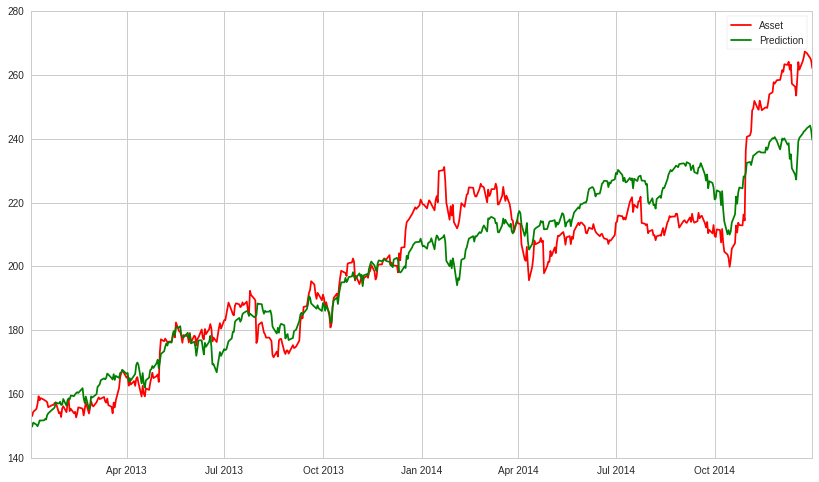

In [644]:
start = '2013-01-01'
end = '2015-01-01'

b1=get_pricing('SPY', fields='price', start_date=start, end_date=end)
b2=get_pricing('MDY', fields='price', start_date=start, end_date=end)
asset=get_pricing('V', fields='price', start_date=start, end_date=end)

X=np.column_stack((b1,b2))

mlr=regression.linear_model.OLS(asset, sm.add_constant(X)).fit()
prediction=mlr.params[0]+mlr.params[1]*b1+ mlr.params[2]*b2 


plt.plot(asset,'r')
plt.plot(prediction,'g');
plt.legend(["Asset","Prediction"]);

In [645]:
mlr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Equity(35920 [V])   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     1460.
Date:                Sat, 02 May 2020   Prob (F-statistic):          1.05e-209
Time:                        16:59:19   Log-Likelihood:                -1897.8
No. Observations:                 504   AIC:                             3802.
Df Residuals:                     501   BIC:                             3814.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        -50.8509      5.918     -8.593      0.000       -62.477   -39.224
x1             0.8758      0.154      5.681      0.000         0.573     1.179
x2             0.4190      0.132      3.180      0.002         0.160     0.678
==============================================================================
Omnibus:                       20.127   Durbin-Watson:                   0.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.737
Skew:                           0.468   Prob(JB):                     3.14e-05
Kurtosis:                       2.667   Cond. No.                     3.70e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.7e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""